# **Project Name**    - Retail Sales Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Md Ismail Quraishi

# **Project Summary -**

Rossmann operates over 3000 drug stores in 7 Europeon countries. Currently rossmann store manager are tasked with predicting their daily sales for upto six weeks in advance. Store sales are influenced by many factors including promotions, competiton, school and state holiday, seasonality and locality. With thousands of managers predicting sales based on their unique circumstances, the accuracy of result can be quite varied. I am provided with historical sales data for 1115 Rossmann stores. My task is to forcast sales columns for the test set. I am provided  with two datasets Rossmann_df and store_df first of all I will read the dataset and try to understand the datasets, then I will check some basic informations like missing values, what all the columns are, descriptions of the dataset. then I will perform data wrangling after that I will visualize some important charts and try to understand them. Then I will handle missing values and outliers. After that I will merge the dataset do feature engineering and also data encoding. Next splitting  the dataset for train and test purpose, after that I will do dimention reduction, data transformation and normalization/standardization. Then I will apply for machine learning algorithm, predicting the data and also evaluate the model. At last I will have to make some conclusion about the project.

# **GitHub Link -**

https://github.com/mdismailquraishicse/capstone_project_3_regression

# **Problem Statement**


Sales prediction is extremely important for any business as it forcast the sales for the clients who want to stock some product for  future. I have two dataset for this project 'Rossmann Stores Data.csv' and 'store.csv'. 'Rossmann Stores Data.csv' has 1017209 rows and 9 columns and 'store.csv' has 1115 rows and 10 columns. I have to do data analysis first for both the datasets and then merge the data after merging the data my task is to apply machine learning regression algorithm to predict the salling price.

**Make a model which is able to predict future sales**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import  StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from numpy import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind,ttest_1samp,t,norm
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
path = '/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Capstone Project/Regression/retail sales predictions/'
# path = 'E:/Data Science/amlabetter/Capstone Projects/REGRESSION/'
f_names = np.array(['Rossmann Stores Data.csv','store.csv'])

from google.colab import drive
drive.mount('/content/drive')

rossmann_df = pd.read_csv(path+f_names[0])
store_df = pd.read_csv(path+f_names[1])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [3]:
# Dataset First Look

# First view for rossmann_df
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
# First view for store_df
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
# Merging two datasets to make final dataset on a commont column 'Store'
final_df = rossmann_df.merge(store_df,how='left', on='Store')
final_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count

# Rows and column counts for  rossmann_df
# print(f" Rows and columns count for rossmann_df : {rossmann_df.shape}")
# print(f" Rows and columns count for store_df : {store_df.shape}")
print(f" Rows and columns count for final_df : {final_df.shape}")

 Rows and columns count for final_df : (1017209, 18)


### Dataset Information

In [7]:
# Dataset Info
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
final_df.duplicated().value_counts()

False    1017209
dtype: int64

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count

# function to calculate the number of null values
def null_calculator(df):
  result = {}
  for col in df.columns:
    result[col] = len(df[df[col].isna() == True])
  return result

null_calculator(final_df)

{'Store': 0,
 'DayOfWeek': 0,
 'Date': 0,
 'Sales': 0,
 'Customers': 0,
 'Open': 0,
 'Promo': 0,
 'StateHoliday': 0,
 'SchoolHoliday': 0,
 'StoreType': 0,
 'Assortment': 0,
 'CompetitionDistance': 2642,
 'CompetitionOpenSinceMonth': 323348,
 'CompetitionOpenSinceYear': 323348,
 'Promo2': 0,
 'Promo2SinceWeek': 508031,
 'Promo2SinceYear': 508031,
 'PromoInterval': 508031}

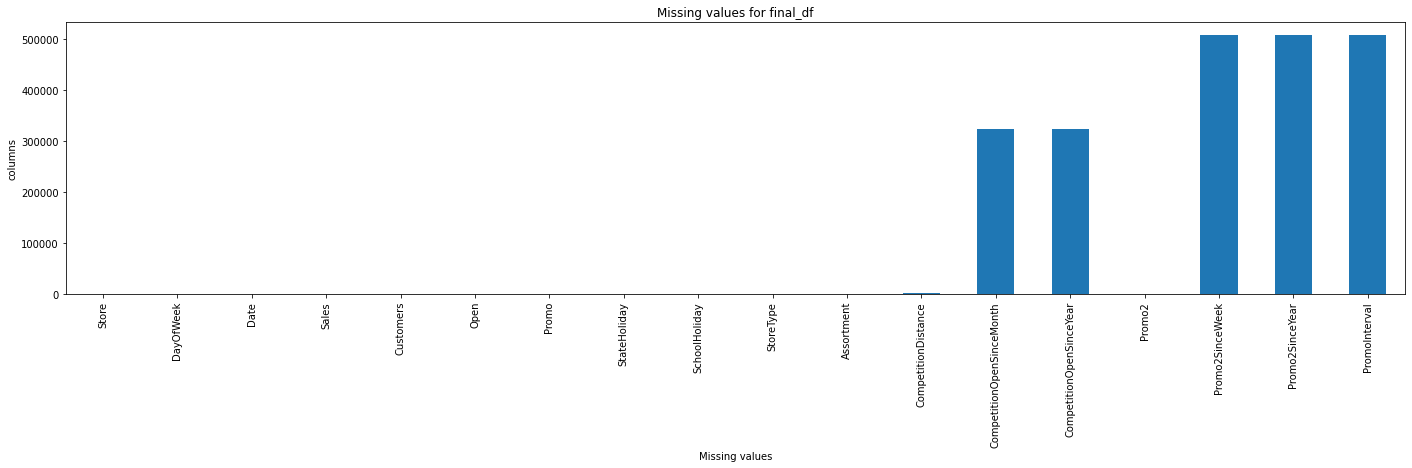

In [10]:
# Visualizing the missing values
plt.rcParams['figure.figsize'] = (24,5)
pd.Series(null_calculator(final_df)).plot.bar()
plt.xlabel('Missing values')
plt.ylabel('columns')
plt.title('Missing values for final_df')
plt.show()

### What did you know about your dataset?

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
list(final_df.columns)

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [12]:
# Dataset Describe
final_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


### Variables Description 

<ol>
    <li>Store - Store ID
    <li>DayOfWeek - Day of the week like 1 for monday, 2 for tuesday etc...
    <li>Date - Date
    <li>Sales - Sales of the day
    <li>Customers - Number of customers
    <li>Open - Shop open or closed
    <li>Promo - Promoting or not
    <li>StateHoliday - what all states has holiday that day
    <li>SchoolHoliday - School holiday or not
    <li>Store - Store ID
    <li>StoreType - Type of store
    <li>Assortment - Type of Product
    <li>CompetitionDistance - Competition Distance
    <li>CompetitionOpenSinceMonth - competition open since month
    <li>CompetitionOpenSinceYear - competition open since year
    <li>Promo2 - Promo 2 or not
    <li>Promo2SinceWeek - Promo2 since week
    <li>Promo2SinceYear - promo2 since year
    <li>PromoInterval - Promo Interval

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for col in final_df.columns:
    print(f" Number of unique values in  | {col} : {len(final_df[col].unique())}")

 Number of unique values in  | Store : 1115
 Number of unique values in  | DayOfWeek : 7
 Number of unique values in  | Date : 942
 Number of unique values in  | Sales : 21734
 Number of unique values in  | Customers : 4086
 Number of unique values in  | Open : 2
 Number of unique values in  | Promo : 2
 Number of unique values in  | StateHoliday : 5
 Number of unique values in  | SchoolHoliday : 2
 Number of unique values in  | StoreType : 4
 Number of unique values in  | Assortment : 3
 Number of unique values in  | CompetitionDistance : 655
 Number of unique values in  | CompetitionOpenSinceMonth : 13
 Number of unique values in  | CompetitionOpenSinceYear : 24
 Number of unique values in  | Promo2 : 2
 Number of unique values in  | Promo2SinceWeek : 25
 Number of unique values in  | Promo2SinceYear : 8
 Number of unique values in  | PromoInterval : 4


In [14]:
# Unique values for store_df
for col in final_df.columns:
    print(f" Unique values in {col} is/are : {final_df[col].unique()}")

 Unique values in Store is/are : [   1    2    3 ... 1113 1114 1115]
 Unique values in DayOfWeek is/are : [5 4 3 2 1 7 6]
 Unique values in Date is/are : ['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015-05-30' '2015-05-29' '

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Assigning copy of final_df to a variable
df1 = final_df.copy()
# Assigning the data to a variable when shop is open
df1_open = df1[df1['Open'] == 1].drop(columns=['Open'])
# df1_open['SalesRate'] = df1_open['Sales']/df1_open['Customers']
df1_open.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,842206.000000,575773.000000,575773.000000,844392.000000,421085.000000,421085.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580,5457.979627,7.224879,2008.697747,0.498684,23.253426,2011.754019
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103,7809.437311,3.210144,5.978048,0.499999,14.100569,1.660962
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000,710.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000,2320.000000,8.000000,2010.000000,0.000000,22.000000,2012.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000,6890.000000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [16]:
# approximately 17% observations are zero
print(f"Percentage of data when shops were closed : {round(len(df1[df1['Open'] == 0])/len(df1),4)*100}.")

# from str to date time conversion
df1_open['Date'] = df1_open['Date'].apply(lambda col: datetime.strptime(col,'%Y-%m-%d'))

# creating day, month, year columns
plt.rcParams['figure.figsize'] = (5,3)
# df1_open['day'] = df1_open['Date'].apply(lambda d: d.day)
# df1_open['month'] = df1_open['Date'].apply(lambda m: m.month)
df1_open['year'] = df1_open['Date'].apply(lambda y: y.year)

Percentage of data when shops were closed : 16.99.


In [17]:
# Function to get top ten sum
def top_10_sum(df,by_col,group_col):
  return df.groupby(by_col)[group_col].sum().sort_values(ascending= False).head(10)

In [18]:
# Assigning top ten stores with highest sales to a variable
top_10_stores_highest_sales = top_10_sum(df1_open,'Store','Sales').reset_index(name='sum of Sales')
top_10_stores_highest_sales

,Store,sum of Sales
0,262,19516842
1,817,17057867
2,562,16927322
3,1114,16202585
4,251,14896870
5,513,14252406
6,788,14082141
7,733,14067158
8,383,13489879
9,756,12911782


In [19]:
# Assigning top ten stores with highest customers to a variable
top_10_stores_highest_cust = top_10_sum(df1_open,'Store','Customers').reset_index(name='sum of Customers')
top_10_stores_highest_cust

,Store,sum of Customers
0,733,3206058
1,262,3204694
2,562,2924960
3,769,2902351
4,1114,2509542
5,817,2454370
6,1097,2280508
7,335,2246936
8,259,2210980
9,251,1908934


In [20]:
# Funcion which returns mean and median
def get_mean_median(df,elem,col='StoreType'):
  '''
    takes dataset, column name and element and returns mean and median
  '''
  try:
    return pd.concat([df[(df[col] == elem)].describe().iloc[1],
                      df[(df[col] == elem)].describe().iloc[5]],
                     axis = 1).rename( columns={'50%':'median'}).fillna('-')
  except:
    print('Invalid input')

In [21]:
print('Unique years are : ',df1_open['year'].unique())
print(' ')
# Getting mean and median for year 2013
get_mean_median(df1_open,elem = 2013,col = 'year')

Unique years are :  [2015 2014 2013]
 


,mean,median
Store,558.014556,558.0
DayOfWeek,3.520301,3.0
Sales,6814.392025,6218.0
Customers,757.537292,670.0
Promo,0.434967,0.0
SchoolHoliday,0.204425,0.0
CompetitionDistance,5434.131250,2320.0
CompetitionOpenSinceMonth,7.229278,8.0
CompetitionOpenSinceYear,2008.675000,2010.0
Promo2,0.510725,1.0


In [22]:
# Getting mean and median for year 2014
get_mean_median(df1_open,elem = 2014,col = 'year')

,mean,median
Store,559.107346,558.0
DayOfWeek,3.512833,3.0
Sales,7025.404201,6427.0
Customers,774.728739,686.0
Promo,0.445923,0.0
SchoolHoliday,0.202276,0.0
CompetitionDistance,5499.563010,2330.0
CompetitionOpenSinceMonth,7.220687,8.0
CompetitionOpenSinceYear,2008.734478,2010.0
Promo2,0.478495,0.0


In [23]:
# Getting mean and median for year 2015
get_mean_median(df1_open,elem = 2015,col = 'year')

,mean,median
Store,558.043115,558.0
DayOfWeek,3.532388,4.0
Sales,7088.126648,6530.0
Customers,752.674864,670.0
Promo,0.466659,0.0
SchoolHoliday,0.161111,0.0
CompetitionDistance,5433.227880,2320.0
CompetitionOpenSinceMonth,7.223921,8.0
CompetitionOpenSinceYear,2008.678895,2010.0
Promo2,0.509896,1.0


In [24]:
# Unique values in column DayOfWeek
print('Unique values in the column DayOfWeek : ',df1['DayOfWeek'].unique())
# Mean and median for Day of week is 1
get_mean_median(df1_open,1,'DayOfWeek')

Unique values in the column DayOfWeek :  [5 4 3 2 1 7 6]


,mean,median
Store,558.419097,558.0
DayOfWeek,1.000000,1.0
Sales,8216.073074,7539.0
Customers,855.444984,769.0
Promo,0.561522,1.0
SchoolHoliday,0.224767,0.0
CompetitionDistance,5444.318492,2330.0
CompetitionOpenSinceMonth,7.223912,8.0
CompetitionOpenSinceYear,2008.694672,2010.0
Promo2,0.499288,0.0


In [25]:
# Mean and median for Day of week is 2
get_mean_median(df1_open,2,'DayOfWeek')

,mean,median
Store,558.377762,558.0
DayOfWeek,2.000000,2.0
Sales,7088.113656,6502.0
Customers,769.986753,684.0
Promo,0.535687,1.0
SchoolHoliday,0.246067,0.0
CompetitionDistance,5430.694492,2330.0
CompetitionOpenSinceMonth,7.224470,8.0
CompetitionOpenSinceYear,2008.692037,2010.0
Promo2,0.499684,0.0


In [26]:
# Mean and median for Day of week is 3
get_mean_median(df1_open,3,'DayOfWeek')

,mean,median
Store,558.280331,558.0
DayOfWeek,3.000000,3.0
Sales,6728.122978,6210.0
Customers,740.598876,658.0
Promo,0.537263,1.0
SchoolHoliday,0.228011,0.0
CompetitionDistance,5427.701827,2330.0
CompetitionOpenSinceMonth,7.223576,8.0
CompetitionOpenSinceYear,2008.690387,2010.0
Promo2,0.500254,1.0


In [27]:
# Mean and median for Day of week is 4
get_mean_median(df1_open,4,'DayOfWeek')

,mean,median
Store,558.418444,558.0
DayOfWeek,4.000000,4.0
Sales,6767.310159,6246.0
Customers,755.569784,673.0
Promo,0.550511,1.0
SchoolHoliday,0.224154,0.0
CompetitionDistance,5449.333696,2330.0
CompetitionOpenSinceMonth,7.225756,8.0
CompetitionOpenSinceYear,2008.702465,2010.0
Promo2,0.497482,0.0


In [28]:
# Mean and median for Day of week is 5
get_mean_median(df1_open,5,'DayOfWeek')

,mean,median
Store,558.308836,558.0
DayOfWeek,5.000000,5.0
Sales,7072.677012,6580.0
Customers,781.771639,698.0
Promo,0.520449,1.0
SchoolHoliday,0.229147,0.0
CompetitionDistance,5429.304305,2330.0
CompetitionOpenSinceMonth,7.223846,8.0
CompetitionOpenSinceYear,2008.692865,2010.0
Promo2,0.500389,1.0


In [29]:
# Mean and median for Day of week is 6
get_mean_median(df1_open,6,'DayOfWeek')

,mean,median
Store,558.340641,558.0
DayOfWeek,6.000000,6.0
Sales,5874.840238,5425.0
Customers,660.177526,573.0
Promo,0.000000,0.0
SchoolHoliday,0.018874,0.0
CompetitionDistance,5434.643101,2330.0
CompetitionOpenSinceMonth,7.224839,8.0
CompetitionOpenSinceYear,2008.692259,2010.0
Promo2,0.500507,1.0


In [30]:
# Mean and median for Day of week is 7
get_mean_median(df1_open,7,'DayOfWeek')

,mean,median
Store,573.880045,530.0
DayOfWeek,7.000000,7.0
Sales,8224.723908,6876.0
Customers,1441.532424,1262.0
Promo,0.000000,0.0
SchoolHoliday,0.022822,0.0
CompetitionDistance,10622.983579,1410.0
CompetitionOpenSinceMonth,7.354478,9.0
CompetitionOpenSinceYear,2009.690765,2011.0
Promo2,0.279711,0.0


In [31]:
# Average sales groupby the column StateHoliday
print('Unique values in column StateHoliday : ',df1['StateHoliday'].unique(),'\n')
df1_open.groupby(['StateHoliday'])['Sales'].mean().reset_index()

Unique values in column StateHoliday :  ['0' 'a' 'b' 'c' 0] 



,StateHoliday,Sales
0,0,6701.492117
1,0,6992.158856
2,a,8487.471182
3,b,9887.889655
4,c,9743.746479


In [32]:
# Average sale groupby the column StoreType
print('Unique values in column StoreType : ',df1['StoreType'].unique(),'\n')
df1_open.groupby(['StoreType'])['Sales'].mean().reset_index()

Unique values in column StoreType :  ['c' 'a' 'd' 'b'] 



,StoreType,Sales
0,a,6925.167661
1,b,10231.407505
2,c,6932.512755
3,d,6822.141881


In [33]:
# Assigning the data when shop is open and promo = 1
df1_open_pro_1 = df1_open[ df1_open['Promo'] == 1]
df1_open_pro_1.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,year
count,376896.000000,376896.000000,376896.000000,376896.000000,376896.0,376896.000000,375917.000000,257191.000000,257191.000000,376896.000000,187884.000000,187884.000000,376896.000000
mean,558.418582,2.965054,8228.281239,844.434401,1.0,0.206325,5437.166289,7.224409,2008.696595,0.498504,23.234437,2011.749979,2013.852707
std,321.889157,1.409123,3175.759157,401.242732,0.0,0.404667,7734.109855,3.211757,5.965429,0.499998,14.093472,1.660695,0.781689
min,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,2013.000000
25%,280.000000,2.000000,6069.000000,596.000000,1.0,0.000000,710.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000,2013.000000
50%,558.000000,3.000000,7649.000000,757.000000,1.0,0.000000,2330.000000,8.000000,2010.000000,0.000000,22.000000,2012.000000,2014.000000
75%,838.000000,4.000000,9686.000000,981.000000,1.0,0.000000,6890.000000,10.000000,2013.000000,1.000000,37.000000,2013.000000,2014.000000
max,1115.000000,5.000000,38722.000000,7388.000000,1.0,1.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,2015.000000


In [34]:
# Getting mean and median for the data where promo = 1 and and store type a.
get_mean_median(df1_open_pro_1,'a')

,mean,median
Store,560.007085,558.0
DayOfWeek,2.964766,3.0
Sales,8304.102317,7646.0
Customers,896.068502,814.0
Promo,1.000000,1.0
SchoolHoliday,0.207182,0.0
CompetitionDistance,5177.590367,1790.0
CompetitionOpenSinceMonth,7.175819,8.0
CompetitionOpenSinceYear,2008.609329,2010.0
Promo2,0.465209,0.0


In [35]:
# Getting mean and median for the data where promo = 1 and and store type b.
get_mean_median(df1_open_pro_1,'b')

,mean,median
Store,555.470202,512.0
DayOfWeek,2.999663,3.0
Sales,11307.994108,10202.5
Customers,2151.453872,2011.0
Promo,1.000000,1.0
SchoolHoliday,0.215993,0.0
CompetitionDistance,1073.670034,900.0
CompetitionOpenSinceMonth,6.743102,6.0
CompetitionOpenSinceYear,2007.818585,2008.0
Promo2,0.288721,0.0


In [36]:
# Getting mean and median for the data where promo = 1 and and store type c.
get_mean_median(df1_open_pro_1,'c')

,mean,median
Store,608.374887,613.0
DayOfWeek,2.967066,3.0
Sales,8041.995526,7572.0
Customers,885.086109,833.0
Promo,1.000000,1.0
SchoolHoliday,0.208778,0.0
CompetitionDistance,3515.790532,1650.0
CompetitionOpenSinceMonth,7.044674,7.0
CompetitionOpenSinceYear,2008.512674,2009.0
Promo2,0.496610,0.0


In [37]:
# Getting mean and median for the data where promo = 1 and and store type d.
get_mean_median(df1_open_pro_1,'d')

,mean,median
Store,533.853972,529.0
DayOfWeek,2.962903,3.0
Sales,8017.828656,7626.0
Customers,668.228104,641.0
Promo,1.000000,1.0
SchoolHoliday,0.203238,0.0
CompetitionDistance,6970.159206,5070.0
CompetitionOpenSinceMonth,7.433022,8.0
CompetitionOpenSinceYear,2009.001667,2010.0
Promo2,0.568960,1.0


In [38]:
# Assigning the data when shop is open and promo = 0
df1_open_pro_0 = df1_open[ df1_open['Promo'] == 0]
df1_open_pro_0.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,year
count,467496.000000,467496.000000,467496.000000,467496.000000,467496.0,467496.000000,466289.000000,318582.000000,318582.000000,467496.000000,233201.000000,233201.000000,467496.000000
mean,558.426416,3.968051,5929.407603,696.856886,0.0,0.183304,5474.759109,7.225258,2008.698677,0.498830,23.268725,2011.757274,2013.815192
std,321.605433,1.821146,2629.648385,388.912683,0.0,0.386916,7869.608732,3.208846,5.988225,0.499999,14.106295,1.661173,0.773266
min,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,2013.000000
25%,281.000000,2.000000,4242.000000,469.000000,0.0,0.000000,710.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000,2013.000000
50%,558.000000,4.000000,5459.000000,610.000000,0.0,0.000000,2320.000000,8.000000,2010.000000,0.000000,22.000000,2012.000000,2014.000000
75%,837.000000,6.000000,7004.000000,809.000000,0.0,0.000000,6890.000000,10.000000,2013.000000,1.000000,37.000000,2013.000000,2014.000000
max,1115.000000,7.000000,41551.000000,5387.000000,0.0,1.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,2015.000000


In [39]:
# Getting mean and median for the data where promo = 0 and storetype is a
get_mean_median(df1_open_pro_0,'a')

,mean,median
Store,560.156013,557.0
DayOfWeek,3.957875,4.0
Sales,5808.500091,5313.0
Customers,713.808454,641.0
Promo,0.000000,0.0
SchoolHoliday,0.183868,0.0
CompetitionDistance,5268.220962,1800.0
CompetitionOpenSinceMonth,7.182118,8.0
CompetitionOpenSinceYear,2008.613328,2010.0
Promo2,0.466720,0.0


In [40]:
# Getting mean and median for the data where promo = 0 and storetype is b
get_mean_median(df1_open_pro_0,'b')

,mean,median
Store,556.202743,512.0
DayOfWeek,4.615401,5.0
Sales,9566.861686,8516.0
Customers,1941.804531,1753.0
Promo,0.000000,0.0
SchoolHoliday,0.165749,0.0
CompetitionDistance,1071.824795,900.0
CompetitionOpenSinceMonth,6.741204,6.0
CompetitionOpenSinceYear,2007.815872,2008.0
Promo2,0.288579,0.0


In [41]:
# Getting mean and median for the data where promo = 0 and storetype is c
get_mean_median(df1_open_pro_0,'c')

,mean,median
Store,608.090778,613.0
DayOfWeek,3.946096,4.0
Sales,6028.063255,5523.0
Customers,758.711536,698.0
Promo,0.000000,0.0
SchoolHoliday,0.186231,0.0
CompetitionDistance,3512.714171,1650.0
CompetitionOpenSinceMonth,7.046692,7.0
CompetitionOpenSinceYear,2008.510895,2009.0
Promo2,0.498361,0.0


In [42]:
# Getting mean and median for the data where promo = 0 and storetype is d
get_mean_median(df1_open_pro_0,'d')

,mean,median
Store,533.918415,529.0
DayOfWeek,3.952026,4.0
Sales,5855.268289,5551.0
Customers,556.294918,531.0
Promo,0.000000,0.0
SchoolHoliday,0.182217,0.0
CompetitionDistance,6996.607473,5070.0
CompetitionOpenSinceMonth,7.427845,8.0
CompetitionOpenSinceYear,2009.012425,2010.0
Promo2,0.569854,1.0


In [43]:
# Assigning the data when shop is open and SchoolHoliday = 1
df1_open_sch_1 = df1_open[ df1_open['SchoolHoliday'] == 1]
df1_open_sch_1.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,year
count,163457.000000,163457.000000,163457.000000,163457.000000,163457.000000,163457.0,163047.000000,111477.000000,111477.000000,163457.000000,80138.000000,80138.000000,163457.000000
mean,558.759435,3.030234,7200.181650,783.121090,0.475740,1.0,5389.761480,7.221965,2008.704764,0.490270,23.138748,2011.742207,2013.770576
std,321.732997,1.446461,3176.299634,401.214163,0.499413,0.0,7691.048061,3.212120,5.884779,0.499907,14.064647,1.656507,0.750487
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,2013.000000
25%,281.000000,2.000000,5004.000000,533.000000,0.000000,1.0,700.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000,2013.000000
50%,558.000000,3.000000,6562.000000,691.000000,0.000000,1.0,2300.000000,8.000000,2010.000000,0.000000,22.000000,2012.000000,2014.000000
75%,838.000000,4.000000,8647.000000,914.000000,1.000000,1.0,6710.000000,10.000000,2013.000000,1.000000,37.000000,2013.000000,2014.000000
max,1115.000000,7.000000,38367.000000,5192.000000,1.000000,1.0,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,2015.000000


In [44]:
# Getting mean and median for the data where SchoolHoliday = 1 and storetype a
get_mean_median(df1_open_sch_1,'a')

,mean,median
Store,559.759487,557.0
DayOfWeek,3.007353,3.0
Sales,7232.849634,6532.0
Customers,823.100867,737.0
Promo,0.477120,0.0
SchoolHoliday,1.000000,1.0
CompetitionDistance,5134.803361,1790.0
CompetitionOpenSinceMonth,7.169024,8.0
CompetitionOpenSinceYear,2008.624613,2010.0
Promo2,0.458203,0.0


In [45]:
# Getting mean and median for the data where SchoolHoliday = 1 and storetype b
get_mean_median(df1_open_sch_1,'b')

,mean,median
Store,547.780403,512.0
DayOfWeek,3.234538,3.0
Sales,10133.519110,9221.5
Customers,1973.000695,1825.5
Promo,0.445796,0.0
SchoolHoliday,1.000000,1.0
CompetitionDistance,1094.864489,900.0
CompetitionOpenSinceMonth,6.825166,6.0
CompetitionOpenSinceYear,2007.910596,2008.0
Promo2,0.281793,0.0


In [46]:
# Getting mean and median for the data where SchoolHoliday = 1 and storetype c
get_mean_median(df1_open_sch_1,'c')

,mean,median
Store,608.189641,613.0
DayOfWeek,3.046700,3.0
Sales,7128.414217,6574.0
Customers,836.097908,773.5
Promo,0.477506,0.0
SchoolHoliday,1.000000,1.0
CompetitionDistance,3509.570862,1650.0
CompetitionOpenSinceMonth,7.052264,7.0
CompetitionOpenSinceYear,2008.541892,2009.0
Promo2,0.483006,0.0


In [47]:
# Getting mean and median for the data where SchoolHoliday = 1 and storetype d
get_mean_median(df1_open_sch_1,'d')

,mean,median
Store,535.490773,534.0
DayOfWeek,3.051992,3.0
Sales,7003.523384,6529.0
Customers,618.750509,586.0
Promo,0.474216,0.0
SchoolHoliday,1.000000,1.0
CompetitionDistance,6944.439578,5070.0
CompetitionOpenSinceMonth,7.437280,8.0
CompetitionOpenSinceYear,2008.991366,2010.0
Promo2,0.563053,1.0


In [48]:
# Assigning the data when shop is open and SchoolHoliday = 0
df1_open_sch_0 = df1_open[ df1_open['SchoolHoliday'] == 0]
df1_open_sch_0.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,year
count,680935.000000,680935.000000,680935.000000,680935.000000,680935.000000,680935.0,679159.000000,464296.000000,464296.000000,680935.000000,340947.000000,340947.000000,680935.000000
mean,558.342140,3.638015,6896.782411,757.833172,0.439297,0.0,5474.356888,7.225578,2008.696062,0.500704,23.280381,2011.756795,2013.846667
std,321.731838,1.763680,3083.774828,401.076920,0.496302,0.0,7837.510267,3.209672,6.000231,0.500000,14.108884,1.661998,0.782836
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,2013.000000
25%,280.000000,2.000000,4826.000000,515.000000,0.000000,0.0,710.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000,2013.000000
50%,558.000000,4.000000,6326.000000,672.000000,0.000000,0.0,2330.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,2014.000000
75%,837.000000,5.000000,8293.000000,887.000000,1.000000,0.0,6900.000000,10.000000,2013.000000,1.000000,37.000000,2013.000000,2014.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,0.0,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,2015.000000


In [49]:
# Getting mean and median for the data where SchoolHoliday = 0 and storetype a
get_mean_median(df1_open_sch_0,'a')

,mean,median
Store,560.168929,558.0
DayOfWeek,3.635566,4.0
Sales,6850.968137,6223.0
Customers,788.671931,716.0
Promo,0.440300,0.0
SchoolHoliday,0.000000,0.0
CompetitionDistance,5250.065664,1800.0
CompetitionOpenSinceMonth,7.181784,8.0
CompetitionOpenSinceYear,2008.608374,2010.0
Promo2,0.467935,0.0


In [50]:
# Getting mean and median for the data where SchoolHoliday = 0 and storetype b
get_mean_median(df1_open_sch_0,'b')

,mean,median
Store,557.770595,512.0
DayOfWeek,4.172093,4.0
Sales,10253.616634,9120.0
Customers,2032.899093,1842.0
Promo,0.367127,0.0
SchoolHoliday,0.000000,0.0
CompetitionDistance,1067.461569,900.0
CompetitionOpenSinceMonth,6.723332,6.0
CompetitionOpenSinceYear,2007.795976,2008.0
Promo2,0.290185,0.0


In [51]:
# Getting mean and median for the data where SchoolHoliday = 0 and storetype c
get_mean_median(df1_open_sch_0,'c')

,mean,median
Store,608.225389,613.0
DayOfWeek,3.618741,4.0
Sales,6884.647499,6373.0
Customers,810.424797,752.0
Promo,0.442155,0.0
SchoolHoliday,0.000000,0.0
CompetitionDistance,3515.201335,1650.0
CompetitionOpenSinceMonth,7.044200,7.0
CompetitionOpenSinceYear,2008.504306,2009.0
Promo2,0.501134,1.0


In [52]:
# Getting mean and median for the data where SchoolHoliday = 0 and storetype d
get_mean_median(df1_open_sch_0,'d')

,mean,median
Store,533.510070,529.0
DayOfWeek,3.618307,4.0
Sales,6779.148215,6364.0
Customers,603.398128,576.0
Promo,0.440668,0.0
SchoolHoliday,0.000000,0.0
CompetitionDistance,6994.345981,5070.0
CompetitionOpenSinceMonth,7.428485,8.0
CompetitionOpenSinceYear,2009.011439,2010.0
Promo2,0.570972,1.0


In [53]:
# Assigining data where promo2 = 1 to a variable.
df1_open_promo2_1 = df1_open[df1_open['Promo2'] == 1]
df1_open_promo2_1.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,year
count,421085.000000,421085.000000,421085.000000,421085.000000,421085.000000,421085.000000,420463.000000,267812.000000,267812.000000,421085.0,421085.000000,421085.000000,421085.000000
mean,560.918349,3.514761,6558.386062,681.373749,0.446190,0.190313,4347.549868,7.188464,2008.202721,1.0,23.253426,2011.754019,2013.827493
std,326.636892,1.719190,2725.197952,322.273235,0.497097,0.392549,5376.697063,3.249393,7.412961,0.0,14.100569,1.660962,0.785814
min,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,1900.000000,1.0,1.000000,2009.000000,2013.000000
25%,280.000000,2.000000,4667.000000,480.000000,0.000000,0.000000,570.000000,4.000000,2005.000000,1.0,13.000000,2011.000000,2013.000000
50%,555.000000,3.000000,6075.000000,614.000000,0.000000,0.000000,2230.000000,7.000000,2009.000000,1.0,22.000000,2012.000000,2014.000000
75%,850.000000,5.000000,7912.000000,800.000000,1.000000,0.000000,5650.000000,10.000000,2012.000000,1.0,37.000000,2013.000000,2014.000000
max,1115.000000,7.000000,41551.000000,4582.000000,1.000000,1.000000,27190.000000,12.000000,2015.000000,1.0,50.000000,2015.000000,2015.000000


In [54]:
# Getting mean and median for data where promo2 = 1 and store type a
get_mean_median(df1_open_promo2_1,'a')

,mean,median
Store,567.873982,566.0
DayOfWeek,3.512163,3.0
Sales,6617.256523,6090.0
Customers,734.618675,669.0
Promo,0.446652,0.0
SchoolHoliday,0.191031,0.0
CompetitionDistance,3760.541128,1310.0
CompetitionOpenSinceMonth,7.276539,7.0
CompetitionOpenSinceYear,2008.260343,2010.0
Promo2,1.000000,1.0


In [55]:
# Getting mean and median for data where promo2 = 1 and store type b
get_mean_median(df1_open_promo2_1,'b')

,mean,median
Store,446.442342,353.0
DayOfWeek,3.998219,4.0
Sales,7990.916073,6605.5
Customers,1866.333704,1525.0
Promo,0.38179,0.0
SchoolHoliday,0.180543,0.0
CompetitionDistance,1234.637133,840.0
CompetitionOpenSinceMonth,-,-
CompetitionOpenSinceYear,-,-
Promo2,1.0,1.0


In [56]:
# Getting mean and median for data where promo2 = 1 and store type c
get_mean_median(df1_open_promo2_1,'c')

,mean,median
Store,602.359246,636.0
DayOfWeek,3.506875,3.0
Sales,6193.817415,5792.0
Customers,705.660251,653.0
Promo,0.448226,0.0
SchoolHoliday,0.190607,0.0
CompetitionDistance,2865.477897,1560.0
CompetitionOpenSinceMonth,6.945365,7.0
CompetitionOpenSinceYear,2007.371516,2008.0
Promo2,1.000000,1.0


In [57]:
# Getting mean and median for data where promo2 = 1 and store type d
get_mean_median(df1_open_promo2_1,'d')

,mean,median
Store,538.544239,522.0
DayOfWeek,3.506786,3.0
Sales,6568.693024,6154.0
Customers,559.018743,534.0
Promo,0.446709,0.0
SchoolHoliday,0.189461,0.0
CompetitionDistance,5862.776377,4270.0
CompetitionOpenSinceMonth,7.136732,7.0
CompetitionOpenSinceYear,2008.443830,2010.0
Promo2,1.000000,1.0


In [58]:
# Assigining data where promo2 = 1 to a variable.
df1_open_promo2_0 = df1_open[df1_open['Promo2'] == 0] 
df1_open_promo2_0.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,year
count,423307.000000,423307.000000,423307.000000,423307.000000,423307.000000,423307.000000,421743.000000,307961.000000,307961.000000,423307.0,0.0,0.0,423307.000000
mean,555.940589,3.525933,7350.557935,843.655999,0.446513,0.196829,6565.039206,7.256545,2009.128237,0.0,NaN,NaN,2013.836358
std,316.758223,1.728137,3394.270985,452.409814,0.497131,0.397602,9513.865557,3.175283,4.316119,0.0,NaN,NaN,0.768632
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,1990.000000,0.0,NaN,NaN,2013.000000
25%,281.000000,2.000000,5090.000000,572.000000,0.000000,0.000000,920.000000,4.000000,2006.000000,0.0,NaN,NaN,2013.000000
50%,560.000000,3.000000,6685.000000,746.000000,0.000000,0.000000,2630.000000,8.000000,2010.000000,0.0,NaN,NaN,2014.000000
75%,827.000000,5.000000,8821.000000,973.000000,1.000000,0.000000,8090.000000,10.000000,2013.000000,0.0,NaN,NaN,2014.000000
max,1114.000000,7.000000,38722.000000,7388.000000,1.000000,1.000000,75860.000000,12.000000,2015.000000,0.0,NaN,NaN,2015.000000


In [59]:
# Getting mean and median for data where promo2 = 0 and store type a
get_mean_median(df1_open_promo2_0,'a')

,mean,median
Store,553.294863,551.0
DayOfWeek,3.514675,3.0
Sales,7193.916672,6457.0
Customers,848.378601,769.0
Promo,0.448154,0.0
SchoolHoliday,0.197153,0.0
CompetitionDistance,6512.323626,2070.0
CompetitionOpenSinceMonth,7.098162,8.0
CompetitionOpenSinceYear,2008.904566,2009.0
Promo2,0.0,0.0


In [60]:
# Getting mean and median for data where promo2 = 0 and store type b
get_mean_median(df1_open_promo2_0,'b')

,mean,median
Store,600.344413,562.0
DayOfWeek,3.998916,4.0
Sales,11140.475115,9970.0
Customers,2084.911029,1949.0
Promo,0.381628,0.0
SchoolHoliday,0.186704,0.0
CompetitionDistance,1006.754584,1210.0
CompetitionOpenSinceMonth,6.741928,6.0
CompetitionOpenSinceYear,2007.816907,2008.0
Promo2,0.0,0.0


In [61]:
# Getting mean and median for data where promo2 = 0 and store type c
get_mean_median(df1_open_promo2_0,'c')

,mean,median
Store,614.020929,596.0
DayOfWeek,3.505963,3.0
Sales,7664.076599,7150.0
Customers,924.211441,861.0
Promo,0.449959,0.0
SchoolHoliday,0.202051,0.0
CompetitionDistance,4156.451738,1690.0
CompetitionOpenSinceMonth,7.121297,8.0
CompetitionOpenSinceYear,2009.36906,2009.0
Promo2,0.0,0.0


In [62]:
# Getting mean and median for data where promo2 = 0 and store type d
get_mean_median(df1_open_promo2_0,'d')

,mean,median
Store,527.73322,548.0
DayOfWeek,3.513768,3.0
Sales,7157.362082,6719.0
Customers,668.928438,636.0
Promo,0.44761,0.0
SchoolHoliday,0.194464,0.0
CompetitionDistance,8472.940958,6260.0
CompetitionOpenSinceMonth,7.757493,9.0
CompetitionOpenSinceYear,2009.636558,2011.0
Promo2,0.0,0.0


In [63]:
# Assigning customer data for each store type.
df_store_a = df1_open[df1_open['StoreType']=='a']
df_store_b = df1_open[df1_open['StoreType']=='b']
df_store_c = df1_open[df1_open['StoreType']=='c']
df_store_d = df1_open[df1_open['StoreType']=='d']


# Assigning data for Promo = 1 and SchoolHoliday = 1 when shops are open
df1_open_promo_1_sch_1 = df1_open[(df1_open['Promo'] == 1) & (df1_open['SchoolHoliday'] == 1)]
# Assigning data for Promo = 1 and SchoolHoliday = 0 when shops are open
df1_open_promo_1_sch_0 = df1_open[(df1_open['Promo'] == 1) & (df1_open['SchoolHoliday'] == 0)]
# Assigning data for Promo = 0 and SchoolHoliday = 1 when shops are open
df1_open_promo_0_sch_1 = df1_open[(df1_open['Promo'] == 0) & (df1_open['SchoolHoliday'] == 1)]
# Assigning data for Promo = 0 and SchoolHoliday = 0 when shops are open
df1_open_promo_0_sch_0 = df1_open[(df1_open['Promo'] == 0) & (df1_open['SchoolHoliday'] == 0)]


# Printing shape of the customer data for each store type.
print("Store type 'a' shape :",df_store_a.shape)
print("Store type 'b' shape :",df_store_b.shape)
print("Store type 'c' shape :",df_store_c.shape)
print("Store type 'd' shape :",df_store_d.shape)
print(' ')

# Printing Shapes of the data
print('Shape of the data when Store is open :',df1_open.shape)
print('Shape of the data when School not holiday :',df1_open_sch_0.shape)
print('Shape of the data when School holiday :',df1_open_sch_1.shape)
print('Shape of the data with promo :',df1_open_pro_0.shape)
print('Shape of the data without promo :',df1_open_pro_1.shape)
print(' ')


# Printing number of days for the above datesets
print('Shape when shop is open promo = 1 and school holiday is 1 :',df1_open_promo_1_sch_1.shape)
print('Shape when shop is open promo = 1 and school holiday is 0 :',df1_open_promo_1_sch_0.shape)
print('Shape when shop is open promo = 0 and school holiday is 1 :',df1_open_promo_0_sch_1.shape)
print('Shape when shop is open promo = 0 and school holiday is 0 :',df1_open_promo_1_sch_1.shape)

Store type 'a' shape : (457077, 18)
Store type 'b' shape : (15563, 18)
Store type 'c' shape : (112978, 18)
Store type 'd' shape : (258774, 18)
 
Shape of the data when Store is open : (844392, 18)
Shape of the data when School not holiday : (680935, 18)
Shape of the data when School holiday : (163457, 18)
Shape of the data with promo : (467496, 18)
Shape of the data without promo : (376896, 18)
 
Shape when shop is open promo = 1 and school holiday is 1 : (77763, 18)
Shape when shop is open promo = 1 and school holiday is 0 : (299133, 18)
Shape when shop is open promo = 0 and school holiday is 1 : (85694, 18)
Shape when shop is open promo = 0 and school holiday is 0 : (77763, 18)


In [64]:
df_store_a.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,year
count,457077.000000,457077.000000,457077.000000,457077.000000,457077.000000,457077.000000,456293.000000,323344.000000,323344.000000,457077.000000,213018.000000,213018.000000,457077.000000
mean,560.089374,3.513504,6925.167661,795.361469,0.447454,0.194300,5227.668362,7.179298,2008.611538,0.466044,23.630773,2011.861622,2013.832295
std,325.811490,1.718700,3277.786381,387.564196,0.497232,0.395661,8634.639714,3.242765,6.609841,0.498846,13.674678,1.717141,0.775662
min,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,2013.000000
25%,276.000000,2.000000,4695.000000,547.000000,0.000000,0.000000,460.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000,2013.000000
50%,557.000000,3.000000,6285.000000,720.000000,0.000000,0.000000,1800.000000,8.000000,2010.000000,0.000000,22.000000,2012.000000,2014.000000
75%,848.000000,5.000000,8406.000000,949.000000,1.000000,0.000000,5100.000000,10.000000,2013.000000,1.000000,37.000000,2013.000000,2014.000000
max,1114.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,48.000000,2015.000000,2015.000000


In [65]:
df_store_b.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,year
count,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,8269.000000,8269.000000,15563.000000,4492.000000,4492.000000,15563.000000
mean,555.923151,3.998715,10231.407505,2021.822335,0.381674,0.184926,1072.529075,6.741928,2007.816907,0.288633,22.372440,2012.790294,2013.850029
std,286.821885,1.997781,5157.190155,911.031277,0.485813,0.388250,810.503970,2.682778,4.808259,0.453142,15.803063,0.407144,0.768549
min,85.000000,1.000000,0.000000,0.000000,0.000000,0.000000,90.000000,3.000000,1999.000000,0.000000,5.000000,2012.000000,2013.000000
25%,335.000000,2.000000,6344.000000,1255.000000,0.000000,0.000000,590.000000,5.000000,2006.000000,0.000000,10.000000,2013.000000,2013.000000
50%,512.000000,4.000000,9130.000000,1839.000000,0.000000,0.000000,900.000000,6.000000,2008.000000,0.000000,14.000000,2013.000000,2014.000000
75%,733.000000,6.000000,13183.500000,2750.500000,1.000000,0.000000,1270.000000,9.000000,2011.000000,1.000000,31.000000,2013.000000,2014.000000
max,1097.000000,7.000000,38722.000000,5494.000000,1.000000,1.000000,3640.000000,10.000000,2014.000000,1.000000,48.000000,2013.000000,2015.000000


In [66]:
df_store_c.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,year
count,112978.000000,112978.000000,112978.000000,112978.000000,112978.000000,112978.000000,112978.000000,81664.000000,81664.000000,112978.000000,56215.000000,56215.000000,112978.000000
mean,608.218370,3.506417,6932.512755,815.465887,0.449096,0.196357,3514.095753,7.045785,2008.511694,0.497575,21.436183,2011.536992,2013.834339
std,325.618107,1.711945,2897.564578,329.744701,0.497404,0.397243,5939.042032,3.194509,4.251577,0.499996,14.775301,1.461723,0.772464
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,1.000000,1994.000000,0.000000,1.000000,2009.000000,2013.000000
25%,362.000000,2.000000,4915.000000,583.000000,0.000000,0.000000,490.000000,4.000000,2006.000000,0.000000,13.000000,2010.000000,2013.000000
50%,613.000000,3.000000,6407.000000,756.000000,0.000000,0.000000,1650.000000,7.000000,2009.000000,0.000000,14.000000,2011.000000,2014.000000
75%,897.000000,5.000000,8349.000000,981.000000,1.000000,0.000000,4030.000000,10.000000,2012.000000,1.000000,35.000000,2013.000000,2014.000000
max,1112.000000,6.000000,31448.000000,3096.000000,1.000000,1.000000,45740.000000,12.000000,2015.000000,1.000000,50.000000,2014.000000,2015.000000


In [67]:
df_store_d.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,year
count,258774.000000,258774.000000,258774.000000,258774.000000,258774.000000,258774.000000,257372.000000,162496.000000,162496.000000,258774.000000,147360.000000,147360.000000,258774.000000
mean,533.889603,3.509792,6822.141881,606.339876,0.447097,0.191615,6984.782455,7.430158,2009.007619,0.569454,23.428047,2011.649674,2013.829168
std,311.987288,1.715724,2556.582881,199.266174,0.497194,0.393573,6827.843352,3.165521,5.409484,0.495154,14.332694,1.650016,0.782655
min,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,50.000000,1.000000,1961.000000,0.000000,1.000000,2009.000000,2013.000000
25%,250.000000,2.000000,5050.000000,464.000000,0.000000,0.000000,1910.000000,4.000000,2006.000000,0.000000,10.000000,2010.000000,2013.000000
50%,529.000000,3.000000,6395.000000,577.000000,0.000000,0.000000,5070.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,2014.000000
75%,792.000000,5.000000,8123.000000,716.000000,1.000000,0.000000,9790.000000,10.000000,2013.000000,1.000000,37.000000,2013.000000,2014.000000
max,1115.000000,7.000000,38037.000000,2239.000000,1.000000,1.000000,48330.000000,12.000000,2015.000000,1.000000,49.000000,2015.000000,2015.000000


### What all manipulations have you done and insights you found?

According to my idea I we will get clear view about the sales which are not clear through graphical representation but we have to deep dive into the dataset to get more information about the sales. Then I experimented the different logic to get insights. I created new dataframe like df1_open, df1_open_promo, school holiday, promo2 , store type etc to know more about the data. Logically when shop is not open then sales should be zero therefore I deleted those observations when shop was not open.

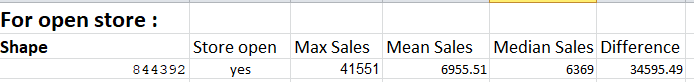

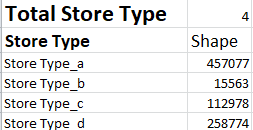

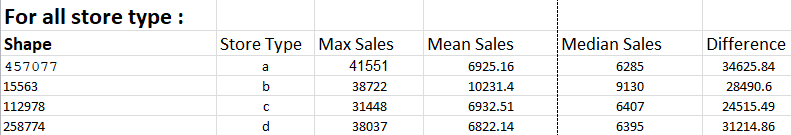

In above picture we can see that mean sales for store type a is 6925.16, for b is 10231, for c is 6932.51 and for type d is 6822.14 therefore we conclude type b store has maximum average sales and sales for b is highest so store b is more profitable in business prespective.

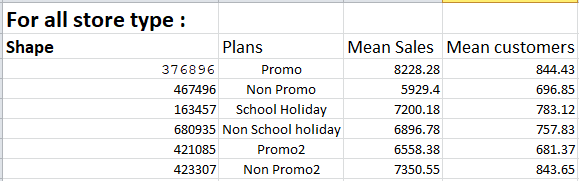

In above picture average sales and average number of customers for promo are highiest so when number of customer is more then sale is also more. Promo is playing important role for sales but in case of  promo2 it is giving less sale in this case promo2 is not good for the business.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Target column dist plot

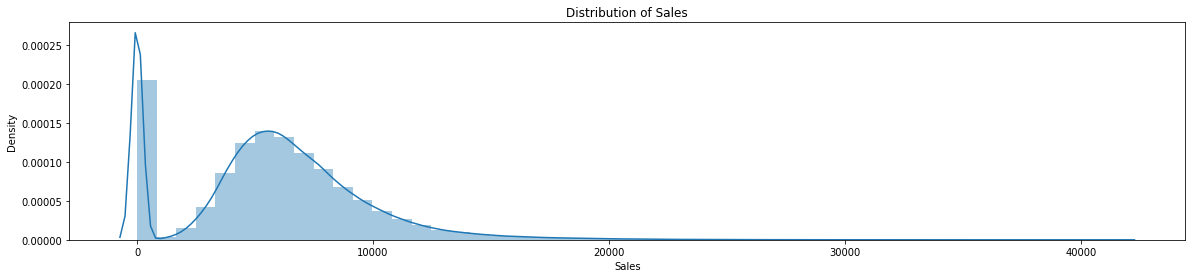

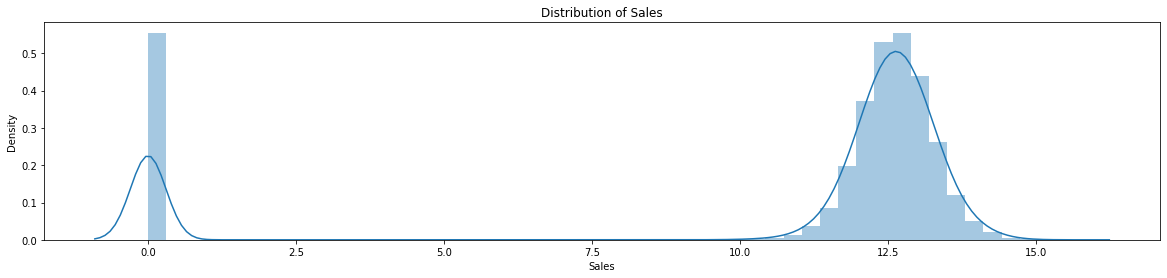

In [68]:
# Chart - 1 visualization code
plt.rcParams['figure.figsize'] =(20,4)
# Before log transformation
sns.distplot(final_df['Sales'])
plt.title('Distribution of Sales')
plt.show()
print('\n')

# After log transformation
sns.distplot(np.log2(final_df['Sales']+1))
plt.title('Distribution of Sales')
plt.show()

##### 1. Why did you pick the specific chart?

Distribution charts shows how data is distributed on the axis. I picked this chart to check the distribution about the target variable.

##### 2. What is/are the insight(s) found from the chart?

From that  chart I found that the Sales column was very close to normal distribution and also it has double peak head it is because there are lot of 0.  After log transformation I found that the distribution became more closer to Normal distribution.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Since the column is normally distributed so it will be very helpfull when ML algorithm will be applied after deleting those observations which is zero, it will give good accuracy. Yes,because there are many zeros it will lead to bad accuracy when applying  machine learning algorith without dropping them.

#### Chart - 2 - Pie chart groupby day of week and sales.

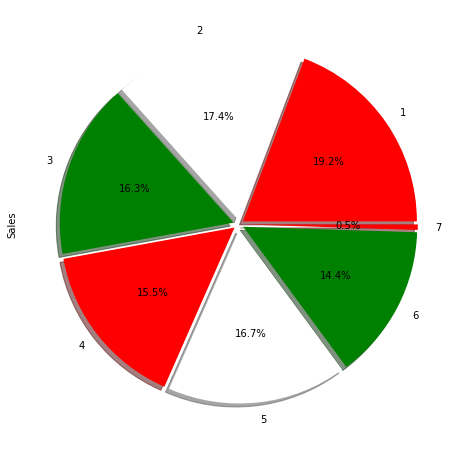

In [69]:
# Chart - 2 visualization code
# Sum of Sales from day 1 to day 7
plt.rcParams['figure.figsize'] = (8,8)
final_df.groupby(['DayOfWeek'])['Sales'].sum().plot.pie(shadow =True,explode=[0.03,0.03,0.03,0.03,0.03,0.03,0.03], autopct='%0.1f%%',colors={'red','white','green'})
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart shows part to whole relationship in the data. I picked this chart to see percentage of Sales for different days.

##### 2. What is/are the insight(s) found from the chart?

I found that sum of sales are maximum at day 1 and minimum at day 7. I think it is because at day 7 most of the time shop not open because of sunday so the sale is minimum and since the day 1 is monday therefore poeple buys more and more because many people could not buy anything at sunday.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes on day 7 sale is minimun but when we see mean sale then it is close to normal day therefore I can say that lot of the customers also want to buy things on day 7.

#### Chart - 3 - Pie chart Groupby Promo and Sales

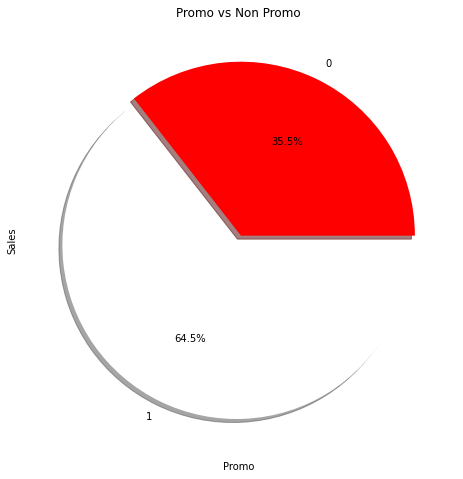

In [70]:
# Chart - 3 visualization code

# Sales comparison for promotional and non promotional
final_df.groupby(['Promo'])['Sales'].mean().plot.pie(shadow =True,explode=[0.03,0.03], autopct='%0.1f%%',colors={'red','white'})
plt.title('Promo vs Non Promo')
plt.xlabel('Promo')
plt.ylabel('Sales')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart express part to whole relationship of the data therefore I picked this chart to see the percentage of sale for promo and non promo.

##### 2. What is/are the insight(s) found from the chart?

In case of promo sale is 64.5% and in another case sale is just 35.5%.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, I found that in case when there is non promo the sale is lower therefore promo play important role with sales.

#### Chart - 4 - Pie chart groupby open and sales.

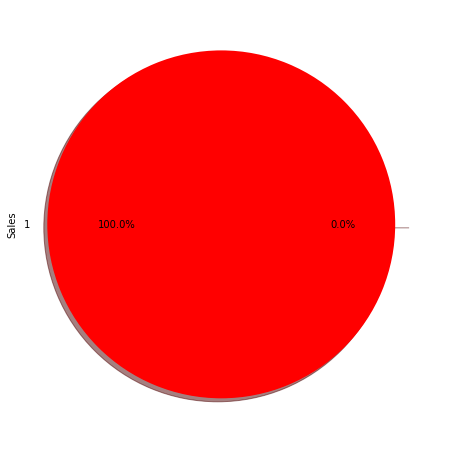

In [71]:
# Chart - 4 visualization code
final_df.groupby(['Open'])['Sales'].mean().plot.pie(shadow =True,explode=[0,0.1], autopct='%0.1f%%',colors={'red'})
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart shows part to whole relationship in the data I picked this chart to check percentage of mean sales when shop is opened/closed.

##### 2. What is/are the insight(s) found from the chart?

I found that the average price is zero when shop is closed and 100% when opened.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Sale is zero when shop is not opened therefore we don't need the data when shop is closed.

#### Chart - 5 - Pie chart groupby school holiday and sales.

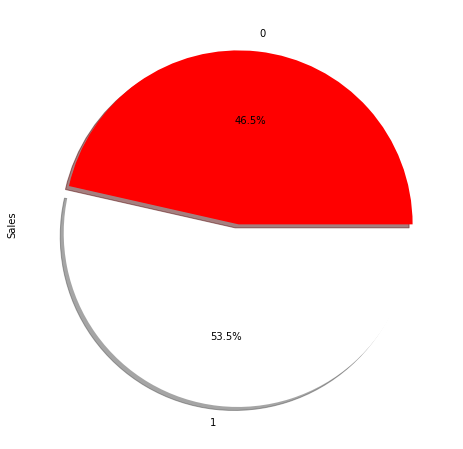

In [72]:
# Chart - 5 visualization code
final_df.groupby(['SchoolHoliday'])['Sales'].mean().plot.pie(autopct='%0.01f%%',explode=[0,0.05],shadow= True,colors={'red','white'})
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart shows part to whole ralationship with the data I picked this chart to percentage of sales on holiday and non holiday for school.

##### 2. What is/are the insight(s) found from the chart?

Average sale for holiday is 53.5% and for non holiday is 46.5%.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

School holiday leading to more sales it might be because there are lot of teenage students who are important customers.

#### Chart - 6 - Pie chart groupby State Holiday and sales.

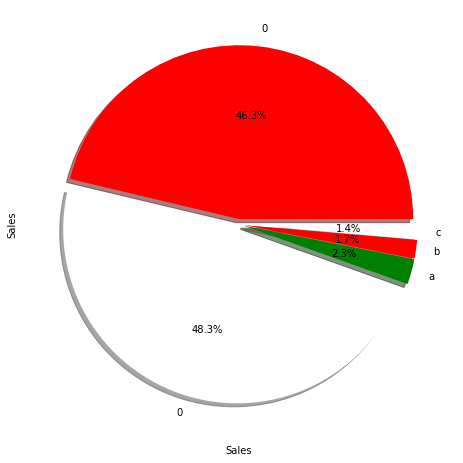

In [73]:
# Chart - 6 visualization code
final_df.groupby(['StateHoliday'])['Sales'].mean().plot.pie(colors={'red','white','green'},shadow= True, autopct='%0.01f%%',explode=[.03,.03,.03,.03,.03])
plt.xlabel('Sales')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart shows part to whole relationship with the data I picked this chart to check percentage of sales for different types of state holiday.

##### 2. What is/are the insight(s) found from the chart?

For state holiday 0 sale is 46.3%, for '0' 48.3%, for a 2.3%, for b 17% and for c 14%.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, more that 90% of sales are when there is no holidays in state and state type '0'. Only few percentage of sales happened during holiday a,b,c. I think a,b,c are state festival and that day customers busy celebrating the festivals therefore those days are not good for business.

#### Chart - 7

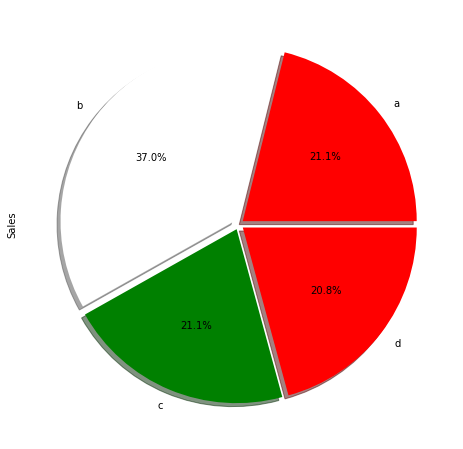

In [74]:
# Chart - 7 visualization code
final_df.groupby(['StoreType'])['Sales'].mean().plot.pie(shadow =True,explode=[0.03,0.03,.03,.03], autopct='%0.1f%%',colors={'red','white','green'})
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart express part to whole relationship with the data I picked this chart to see percentage of sales for each store type.

##### 2. What is/are the insight(s) found from the chart?

I found that average sales for type b is highest 37% rest a,c,d are nearly 21% each.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, here I found that sales for type b shop is highest 37%.
and for type a,c,d has approximately 21% therefore type b is leading towards more sales.

#### Chart - 8

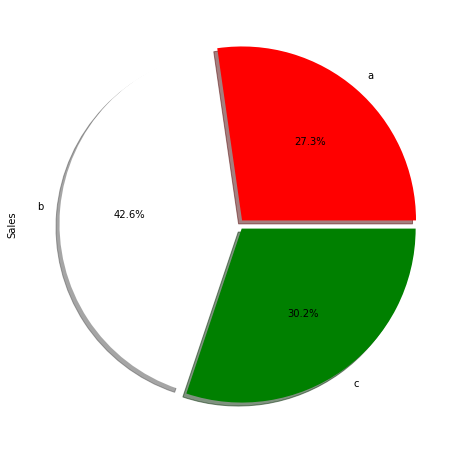

In [75]:
# Chart - 8 visualization code
final_df.groupby(['Assortment'])['Sales'].mean().plot.pie(shadow =True,explode=[0.03,0.03,.03], autopct='%0.1f%%',colors={'red','white','green'})
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart expresses part to whole relationship with the data I picked this chart to see percentage of sales for each type of assortments.

##### 2. What is/are the insight(s) found from the chart?

I found that average sales for type a is 42.6%, b is 27.3% and c is 30.2%.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, average sale for type b is highest that is 42.6% so demand for this assortment type is highest.

#### Chart - 9

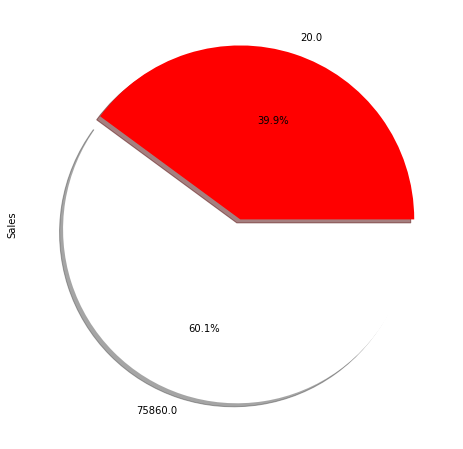

In [76]:
# Chart - 9 visualization code
final_df[ (final_df['CompetitionDistance'] == final_df['CompetitionDistance'].min())\
         | (final_df['CompetitionDistance'] == final_df['CompetitionDistance'].max())].\
groupby(['CompetitionDistance'])['Sales'].mean().plot.pie(shadow =True,explode=[0.03,.03], autopct='%0.1f%%',colors={'red','white'})
plt.show()

##### 1. Why did you pick the specific chart?

To see effect of competition distance on average sales.

##### 2. What is/are the insight(s) found from the chart?

I found that for min competition distance average sales is lower but for high competition distance average sale is also higher.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Average Sales for min competition distance is about 5000 but for max competition it is approximately 7000.

#### Chart - 10

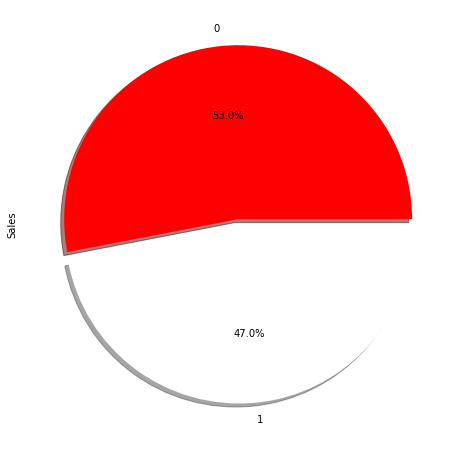

In [77]:
# Chart - 10 visualization code
final_df.groupby(['Promo2'])['Sales'].mean().plot.pie(shadow =True,explode=[0.03,0.03], autopct='%0.1f%%',colors={'red','white'})
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart expresses part to whole relationship with data I picked this chart to see percentage of average sale for Promo2.

##### 2. What is/are the insight(s) found from the chart?

Average sales when promo2 is yes then only 47% and when promo2 is No then 53%.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, promo2 is leading towards less sale therefore shop keeper should avoid promo2 to get more sales.

#### Chart - 11

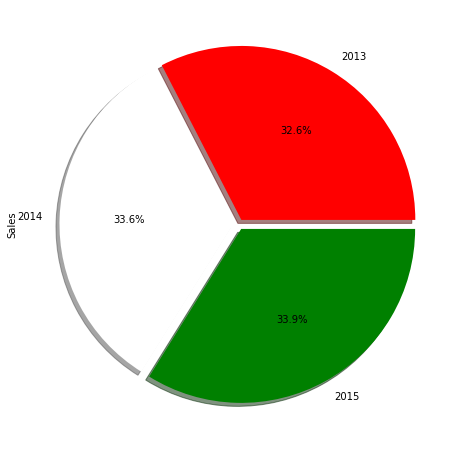

In [78]:
# Chart - 11 visualization code
df1_open.groupby(['year'])['Sales'].mean().plot.pie(shadow =True,explode=[0.03,0.03,.03], autopct='%0.1f%%',colors={'red','white','green'})
plt.show()

##### 1. Why did you pick the specific chart?

A pic chart expresses part to whole relationship with the data. I picked this chart to see percentage of average sale for  each year.

##### 2. What is/are the insight(s) found from the chart?

Average sale for 2013,2014 and 2015 is almost equal which is nearly 33%.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No, Sales for each year is almost same.

#### Chart - 12

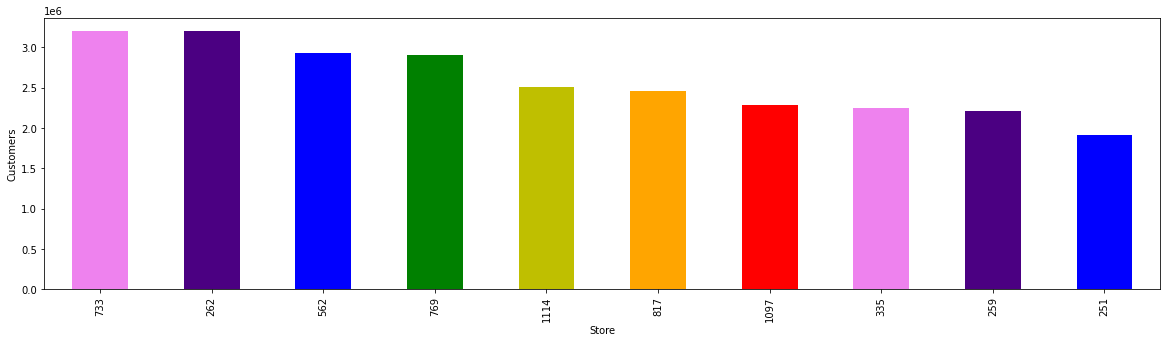

In [79]:
# Chart - 12 visualization code
colors = ['violet','indigo','b','g','y','orange','r']
plt.rcParams['figure.figsize'] = (20,5)
top_10_sum(df1_open,'Store','Customers').plot.bar(color = colors)
plt.ylabel('Customers')
plt.xlabel('Store')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart shows frequency counts of values for different columns, I picked this chart to see top ten stores with highest number of customers.

##### 2. What is/are the insight(s) found from the chart?

Store no 732 has highest number of customers , 261 has 2nd highest and 250 has least number of customers among these 10.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No.

#### Chart - 13

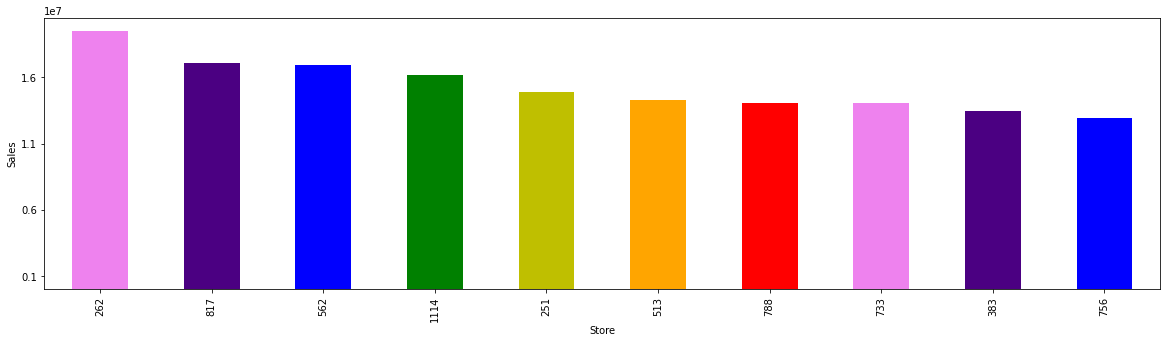

In [80]:
# Chart - 13 visualization code
top_10_sum(df1_open,'Store','Sales').plot.bar(color = colors)
plt.ylabel('Sales')
plt.xlabel('Store')
plt.yticks(np.arange(1000000,20000001,5000000))
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart shows frequency counts for different columns, I picked this chart to see top ten stores who made highest sales.

##### 2. What is/are the insight(s) found from the chart?

Store number 262 made higest sale and 817 made 2nd highest but 756 made least sales among these 10.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, In chart 11 I found that shop 732 has highest number of customers but in 12th chart shop number 262 made highest sales. I think there are few customer who buys product in bulk quantity.

#### Chart - 14 - Correlation Heatmap

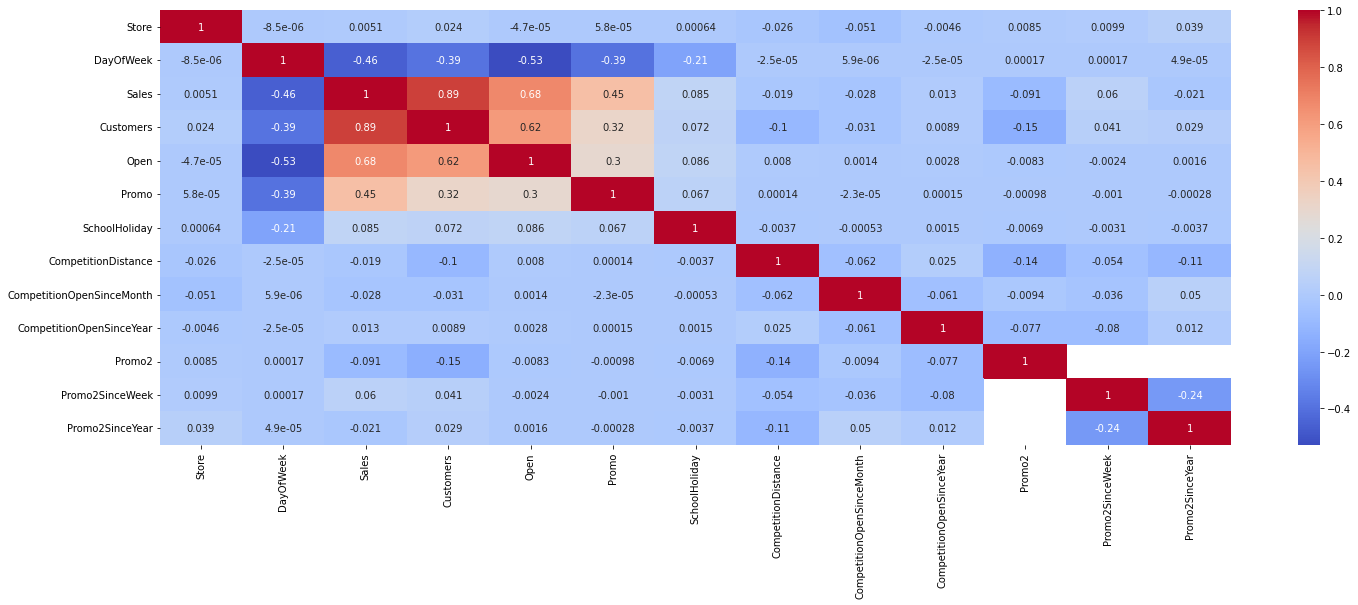

In [81]:
# Correlation Heatmap visualization code
plt.rcParams['figure.figsize'] = (24,8)
corr = final_df.corr()
sns.heatmap(corr,annot=True, cmap= 'coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

Corellation chart shows relationship between variables therefore I picked this chart to check correlations.

##### 2. What is/are the insight(s) found from the chart?

I found that our target variable Sales has -0.46 corralation with day of week, 0.89 with customers, 0.68 with open, 0.45 with Promo. Variable day of week has -0.39 correlation with customers, -0.53 with open,-0.39 with promo, -0.21with school holiday. Variable customers has correlation with 0.62 with open, 0.32 with promo and -0.15 with promo2. Variable Open has correlation 0.3 with Promo.
Variable Competition Distance has correlation -0.14 with promo2 and -0.11 with Promo2SinceYear. rest of the variables have very less correlations with each other.

#### Chart - 15 - Pair Plot 

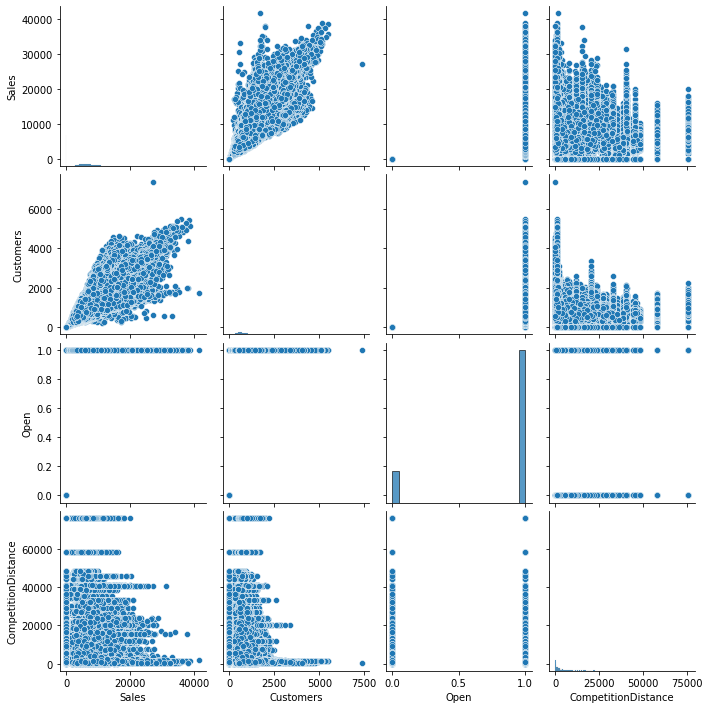

In [82]:
# Pair Plot visualization code
drop_col = ['Store','Date','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek',
            'Promo2SinceYear','PromoInterval','DayOfWeek','Promo','SchoolHoliday','StateHoliday',
            'Promo2']
            
sns.pairplot(final_df.drop(columns = drop_col))
plt.show()

##### 1. Why did you pick the specific chart?

Pair chart gives very good visualization of realtionship between two variables which is very important to select and understand the variables I picked this chart to see the relationship between the variables.

##### 2. What is/are the insight(s) found from the chart?

I found that only Sales and Customers has linear relationship.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer here.

*   Mean sale for promo = 1 is greater than or equal to the mean sale when promo = 0.
*   Mean sale  is 0 when shop is closed.
*   Mean sale for store type b is equal to mean sales of a+b+c.

### Hypothetical Statement - 1
* Mean Sale for promo = 1 is equal to mean sale for promo = 0.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*   Mean sale for promo = 1 is greater than or equal to the mean sale when promo = 0.
* H0: promo_mean >= non_promo_mean
* H1: promo_mean < non_promo_mean

#### 2. Perform an appropriate statistical test.

In [83]:
# Perform Statistical Test to obtain P-Value

s1 = final_df[final_df['Promo']== 1]['Sales']
s2 = final_df[final_df['Promo']== 0]['Sales']

dof = len(s1)+len(s2)-2
alpha = 1-0.05
lower = t.ppf(alpha,dof)
statistic, p_value = ttest_ind(s1,s2,equal_var=False, alternative='less')

print('dof',dof)
print('alpha ',alpha)
print(f"lower bound : {lower}")
print(f"Statistic : {statistic}  p_value : {p_value}")
if  statistic < lower:
  print('Null hypothesis is rejected')
else :
  print('Failed to reject null hypothesis')

dof 1017207
alpha  0.95
lower bound : 1.6448551249460235
Statistic : 512.3755316936371  p_value : 1.0
Failed to reject null hypothesis


##### Which statistical test have you done to obtain P-Value?

I have done T-test to get P_value.

##### Why did you choose the specific statistical test?

Because my sample size and variance are not same.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Mean Sale is 0 when shop is closed.
* H0: mean Sale = 0
* H1: mean Sale > 0
* Significance level = 0.05

#### 2. Perform an appropriate statistical test.

In [84]:
# Perform Statistical Test to obtain P-Value
s1 = final_df[final_df['Open'] == 0]['Sales']
samp_mean = s1.mean()
pop_mean = final_df['Sales'].mean()
s = s1.std()
n = len(s1)
alpha = 1-0.05
critical_value = t.ppf(alpha,n-1)
t_statistic = (samp_mean- pop_mean)/(s/np.sqrt(n))

print('Sample mean :', samp_mean)
print('population mean :', pop_mean)
print('s',s)
print('n',n)
print('alpha ',alpha)
print('critical value ',critical_value)
print('t_statistic ',t_statistic)

if t_statistic > critical_value:
  print('Null hypothesis is rejected')
else :
  print('Null hypothesis is accepted')

Sample mean : 0.0
population mean : 5773.818972305593
s 0.0
n 172817
alpha  0.95
critical value  1.6448624442911028
t_statistic  -inf
Null hypothesis is accepted


##### Which statistical test have you done to obtain P-Value?

I have done t statistic test to obrain p_value.

##### Why did you choose the specific statistical test?

Because the variance for sample and population were different.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Mean sale for store type b is equal to mean sales of a+c+d.
* H0: E[b] = E[a+c+d]
* H1: E[b] != E[a+c+d]

#### 2. Perform an appropriate statistical test.

In [85]:
# Perform Statistical Test to obtain P-Value
sa = final_df[final_df['StoreType'] == 'a']['Sales']
sb = final_df[final_df['StoreType'] == 'b']['Sales']
sc = final_df[final_df['StoreType'] == 'c']['Sales']
sd = final_df[final_df['StoreType'] == 'd']['Sales']
# mean1 = sb.mean()
mean2 = sa.mean()+sc.mean()+sd.mean()
dof = len(sa)-1
lower = t.ppf(0.025,dof)
upper = t.ppf(0.975,dof)
stat,p_value = ttest_1samp(sa,mean2)

print(f"lower : {lower} and upper :{upper}")
print(f'Statistic :{stat} and p_value: {p_value}')
if stat < lower or stat > upper:
  print('Null hypothesis is rejected')
else:
  print('null hypothesis is accepted')

lower : -1.9599682850558875 and upper :1.959968285055887
Statistic :-2129.4753015301285 and p_value: 0.0
Null hypothesis is rejected


##### Which statistical test have you done to obtain P-Value?

I have done t statistic test.

##### Why did you choose the specific statistical test?

Because standard daviation of the samples were different.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [86]:
# Handling Missing Values & Missing Value Imputation
df = final_df.copy()
df = df[df['Open'] == 1]
for i in null_calculator(df).keys():
    print(f"{i} : {null_calculator(df)[i]/len(df)*100}")
    
# Filling nan values with mean in column CompetitionDistance
# df['CompetitionDistance'] = df['CompetitionDistance'].fillna(df['CompetitionDistance'].mean())

# Filling nan values with median in column CompetitionOpenSinceMonth and CompetitionOpenSinceYear
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].median())
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].median())


# dropping the columns which has more than 45% null values because already lost lot of informations and also dropping the rows
# which has only less than 1% null values. 
col_to_drop = ['Open','Promo2SinceWeek','Promo2SinceYear','PromoInterval']
df.drop(columns=col_to_drop,inplace=True)
df = df.dropna()

Store : 0.0
DayOfWeek : 0.0
Date : 0.0
Sales : 0.0
Customers : 0.0
Open : 0.0
Promo : 0.0
StateHoliday : 0.0
SchoolHoliday : 0.0
StoreType : 0.0
Assortment : 0.0
CompetitionDistance : 0.25888449914257833
CompetitionOpenSinceMonth : 31.81212043695345
CompetitionOpenSinceYear : 31.81212043695345
Promo2 : 0.0
Promo2SinceWeek : 50.13157396090915
Promo2SinceYear : 50.13157396090915
PromoInterval : 50.13157396090915


#### What all missing value imputation techniques have you used and why did you use those techniques?

First of all I deleted all data when Stores were closed then I fill nan values in columns CompetitionDistance and CompetitionOpenSinceYear with median and I dropped those columns which contains more than 40% nan values. I also dropped some observations which containing less than 1% nan values. Since the Open column was containing contant value 1 therefore I decided to drop this column too.

### 2. Handling Outliers

Shape before outlier removal (842152, 14)


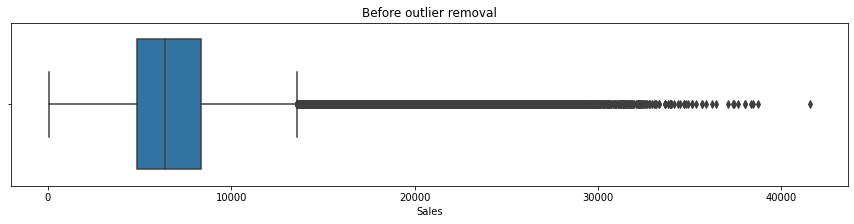

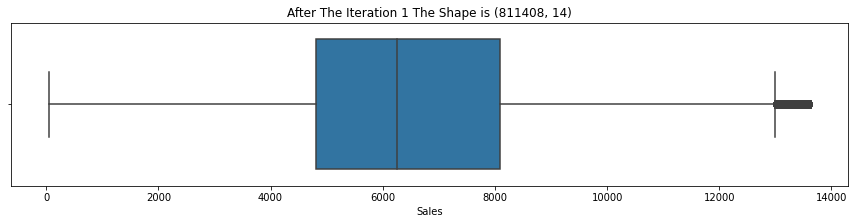

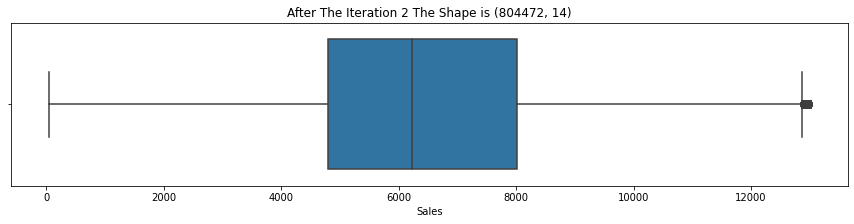

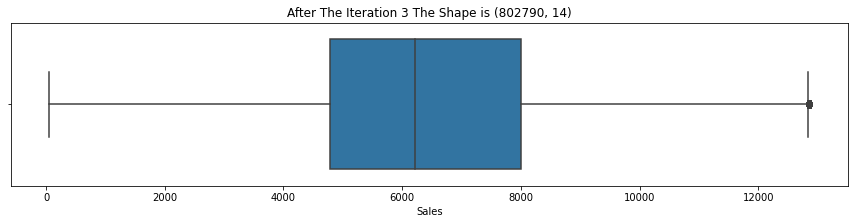

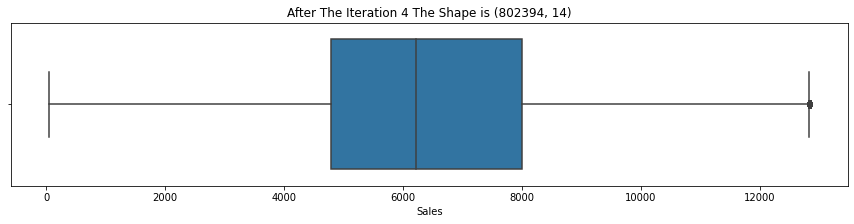

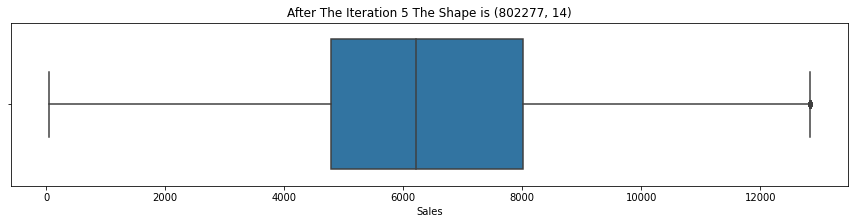

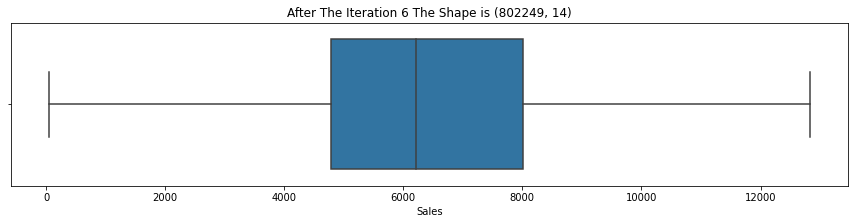

In [87]:
# Handling Outliers & Outlier treatments
# Single variate outlier detection
# Dropping those observations when sale is zero
df = df[df['Sales']!=0]
# Plotting outliers
plt.rcParams['figure.figsize'] = (15,3)
sns.boxplot(df['Sales'])
plt.title('Before outlier removal')
print(f"Shape before outlier removal {df.shape}")
plt.show()
print('')
for i in range(1,7):
  q1 = df['Sales'].quantile(.25)
  q3 = df['Sales'].quantile(.75)
  iqr = q3-q1
  lower = q1-(1.5*iqr)
  upper = q3+(1.5*iqr)
  df = df[(df['Sales'] <= upper) & (df['Sales'] >= lower)]
  sns.boxplot(df['Sales'])
  plt.title('After The Iteration '+ str(i) +' The Shape is '+ str(df.shape))
  plt.show()
  print('')

##### What all outlier treatment techniques have you used and why did you use those techniques?

I deleted those observation when sale is 0 because when customer is 0 then sale is also 0 therefore these are some kind of outliers. Then I focused on the target column and deleted some outliers using  1.5*IQR method.

### 3. Categorical Encoding

In [88]:
# Encode your categorical columns

# one hot encoding for Assortment
df['AssortmentA'] = df['Assortment'].apply(lambda data: 1 if data == 'a' else 0)
df['AssortmentB'] = df['Assortment'].apply(lambda data: 1 if data == 'b' else 0)
df['AssortmentC'] = df['Assortment'].apply(lambda data: 1 if data == 'c' else 0)

#Store type one hot encoding
df['StoreTypeA'] = df['StoreType'].apply(lambda data: 1 if data == 'a' else 0)
df['StoreTypeB'] = df['StoreType'].apply(lambda data: 1 if data == 'b' else 0)
df['StoreTypeC'] = df['StoreType'].apply(lambda data: 1 if data == 'c' else 0)
df['StoreTypeD'] = df['StoreType'].apply(lambda data: 1 if data == 'd' else 0)

# Econding StateHoliday
df['sh_a'] = df['StateHoliday'].apply(lambda data: 1 if data == 'a' else 0)
df['sh_b'] = df['StateHoliday'].apply(lambda data: 1 if data == 'b' else 0)
df['sh_c'] = df['StateHoliday'].apply(lambda data: 1 if data == 'c' else 0)
df['sh_d'] = df['StateHoliday'].apply(lambda data: 1 if data == 0 else 0)
df['sh_e'] = df['StateHoliday'].apply(lambda data: 1 if data == '0' else 0)

# Dropping the columns
df.drop(columns =['Assortment', 'StoreType','StateHoliday'], inplace= True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Here I did one hot encoding to StateHoliday, StoreType and Assortment columns because the mean price of each catagory was different.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [89]:
# Manipulate Features to minimize feature correlation and create new features

# from str to date time conversion
df['Date'] = df['Date'].apply(lambda col: datetime.strptime(col,'%Y-%m-%d'))

# creating day, month, year columns
plt.rcParams['figure.figsize'] = (5,3)
df['day'] = df['Date'].apply(lambda d: d.day)
df['month'] = df['Date'].apply(lambda m: m.month)
df['year'] = df['Date'].apply(lambda y: y.year)

# Dropping Date column
df.drop(columns=['Date'], inplace=True)

In [90]:
#Multicollinearity
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [91]:
# Multicolinearitiy check
high_vif_col = ['Store','Sales','year','AssortmentA','sh_d','StoreTypeA','sh_e','CompetitionOpenSinceYear']
calc_vif(df[[i for i in df.describe().columns if i not in high_vif_col ]])

,variables,VIF
0,DayOfWeek,4.672971
1,Customers,6.912832
2,Promo,1.950763
3,SchoolHoliday,1.274813
4,CompetitionDistance,1.566910
5,CompetitionOpenSinceMonth,6.822633
6,Promo2,2.019949
7,AssortmentB,2.537448
8,AssortmentC,2.028764
9,StoreTypeB,2.642043


#### 2. Feature Selection

In [92]:
# Select your features wisely to avoid overfitting
selected_features = ['DayOfWeek','Customers','Promo','SchoolHoliday','CompetitionDistance','CompetitionOpenSinceMonth','Promo2',\
                     'AssortmentB','AssortmentC','StoreTypeB','StoreTypeC','StoreTypeD','sh_a','sh_b','sh_c','day','month','Sales']
selected_df = df[selected_features]

##### What all feature selection methods have you used  and why?

I simply used vif method to find good featues.

##### Which all features you found important and why?

I choosed these feature because these has less than 7 vif scores.
* DayOfWeek
* Customers
* Promo
* SchoolHoliday
* CompetitionDistance
* CompetitionOpenSinceMonth
* Promo2
* AssortmentB
* AssortmentC
* StoreTypeB
* StoreTypeC
* StoreTypeD
* sh_a
* sh_b
* sh_c
* day
* month
* Sales

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [93]:
# Transform Your data
X = np.log10(selected_df[['Customers','CompetitionDistance']])
selected_df['Customers'] = X['Customers']
selected_df['CompetitionDistance'] = X['CompetitionDistance']
del X

My data was in different range . To make them in same range data transformation is needed. Here I am using log transformation to make data more close to normal distribution.

### 6. Data Scaling

In [94]:
# Scaling your data
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(selected_df[['Customers','CompetitionDistance']])
selected_df['Customers'] = X[:,0]
selected_df['CompetitionDistance'] = X[:,1]
del X

##### Which method have you used to scale you data and why?

Here I used standard scaler because my data was already close to normal distribution.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

I do not think in my case dimentionality reduction is needed because I already have limited features.

In [95]:
# DImensionality Reduction (If needed)

from sklearn.decomposition import PCA
pca = PCA(random_state=0)
X = pca.fit_transform(selected_df.drop(columns=['Sales']))
pca.explained_variance_ratio_

array([7.54669422e-01, 1.10517480e-01, 7.24135880e-02, 3.01414466e-02,
       1.29697209e-02, 7.74500786e-03, 2.73404667e-03, 2.31787192e-03,
       2.02184137e-03, 1.76036736e-03, 1.51052214e-03, 9.81347271e-04,
       1.84295772e-04, 2.39145547e-05, 7.14477817e-06, 1.30583362e-06,
       6.77548339e-07])

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used PCA for reducing my dimentions.

### 8. Data Splitting

In [96]:
# Split your data to train and test. Choose Splitting ratio wisely.
xtrain,xtest,ytrain,ytest = train_test_split(X, selected_df['Sales'], test_size=.2)

##### What data splitting ratio have you used and why? 

I choose 20% for test and rest 80% to train my model because more data is needed to train a model well.

## ***7. ML Model Implementation***

### ML Model - 1 - Linear Regression

In [97]:
# ML Model - 1 Implementation
linearModel = LinearRegression()
# Fit the Algorithm
linearModel.fit(xtrain,ytrain)
print(f" coefficients for the model are :\n{linearModel.coef_}")
print(f" Model intercept is : {linearModel.intercept_}")

# Predict on the model
pred_train = linearModel.predict(xtrain)
pred_test = linearModel.predict(xtest)

 coefficients for the model are :
[  -16.80402821    42.30951845    25.10924352  -313.8581451
  -951.80163131 -1661.37831152 -1098.07734969  -708.55326138
   371.18736556  -583.63172934     2.84197305   249.0877586
 -2384.33604916  1656.24512737   -35.09360555   485.76722095
  1036.50907927]
 Model intercept is : 6512.157624090957


In [98]:
linearModel.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [99]:
def show_metrix(xtrain,ytrain,xtest,ytest):
  pd.Series([r2_score(ytrain,pred_train),r2_score(ytest,pred_test)],\
          index=['Train R2_score', 'Test R2_score']).plot.bar(color=['red','green'])
  plt.show()
  #Printing scores
  print(' ')
  print(f"R2_score train : {r2_score(ytrain,pred_train)}")
  print(f"R2_score test : {r2_score(ytest,pred_test)}\n")

  # mean squared for train and test
  pd.Series([np.math.sqrt(mean_squared_error(ytest,pred_test)),np.math.sqrt(mean_squared_error(ytest,pred_test))],\
            index=['Train RMSE', 'Test RMSE']).plot.bar(color=['red','green'])
  plt.show()
  # Printing scores
  print(' ')
  print(f"Root mean squared error train : {np.math.sqrt(mean_squared_error(ytrain,pred_train))}")
  print(f"Root mean squared error test : {np.math.sqrt(mean_squared_error(ytest,pred_test))}")

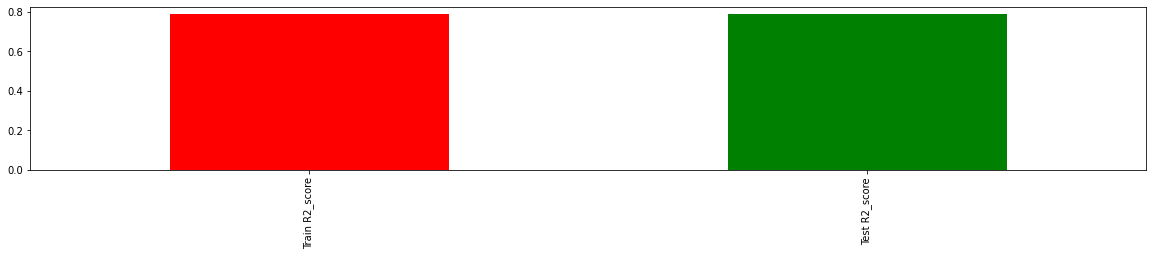

 
R2_score train : 0.7856032763350733
R2_score test : 0.7861133352062384



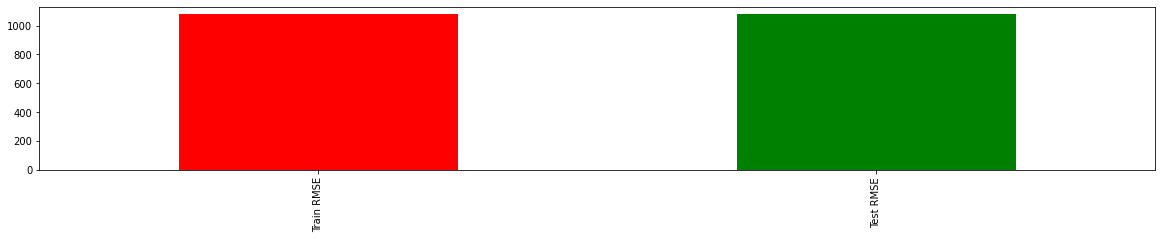

 
Root mean squared error train : 1077.4120956900017
Root mean squared error test : 1078.405205799276


In [100]:
# Visualizing evaluation Metric Score chart
plt.rcParams['figure.figsize'] = (20,3)
# Metrices
show_metrix(xtrain,ytrain,xtest,ytest)

Here I am using R2score evaluation matrix to see the performance of my model my r2score is .78 for train and test predictions.
then I used root mean squared error matrix to see the error for actual and predicted data and the error for train is 1115 and for test is 1117 which is nearly equal to each other therefore I can say that the model is not overfit.

#### 2. Cross- Validation & Hyperparameter Tuning

In [101]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
grid_param = {'fit_intercept': [True,False],'positive': [True,False]}
grid_model = GridSearchCV(linearModel,cv=10, param_grid = grid_param)
# cross validation fitting
grid_model.fit(xtrain,ytrain)
bestLinearEstimator = grid_model.best_estimator_

print(f" coefficients for the model are :\n{bestLinearEstimator.coef_}")
print(f" Model intercept is : {bestLinearEstimator.intercept_}")

# Predict on the model
pred_train = bestLinearEstimator.predict(xtrain)
pred_test = bestLinearEstimator.predict(xtest)

 coefficients for the model are :
[  -16.80402821    42.30951845    25.10924352  -313.8581451
  -951.80163131 -1661.37831152 -1098.07734969  -708.55326138
   371.18736556  -583.63172934     2.84197305   249.0877586
 -2384.33604916  1656.24512737   -35.09360555   485.76722095
  1036.50907927]
 Model intercept is : 6512.157624090957


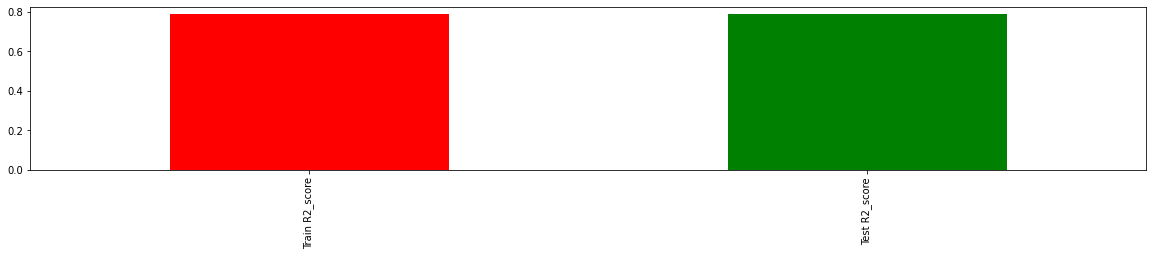

 
R2_score train : 0.7856032763350733
R2_score test : 0.7861133352062384



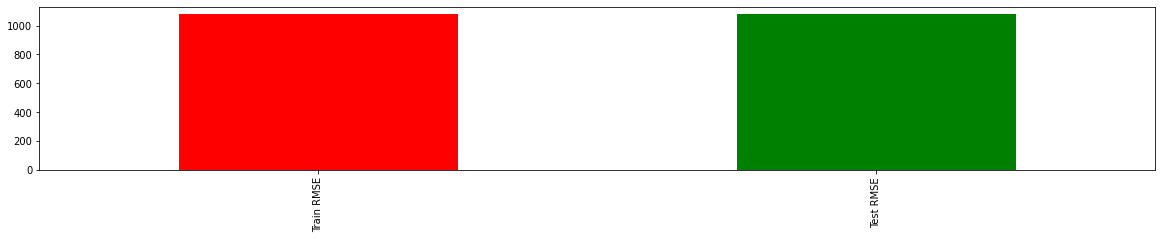

 
Root mean squared error train : 1077.4120956900017
Root mean squared error test : 1078.405205799276


In [102]:
# Visualizing evaluation Metric Score chart
# Metrices
show_metrix(xtrain,ytrain,xtest,ytest)

##### Which hyperparameter optimization technique have you used and why?

I used fit_intercept and positive hyper parameters to tune the model because Linear Regression has limited hyper parameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I did not see any improvement.

### ML Model - 2 - Decision Tree Regressor

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [103]:
# Fitting decission tree regressor
dtrModel = DecisionTreeRegressor()
dtrModel.fit(xtrain,ytrain)

# Predicting
pred_train = dtrModel.predict(xtrain)
pred_test = dtrModel.predict(xtest)

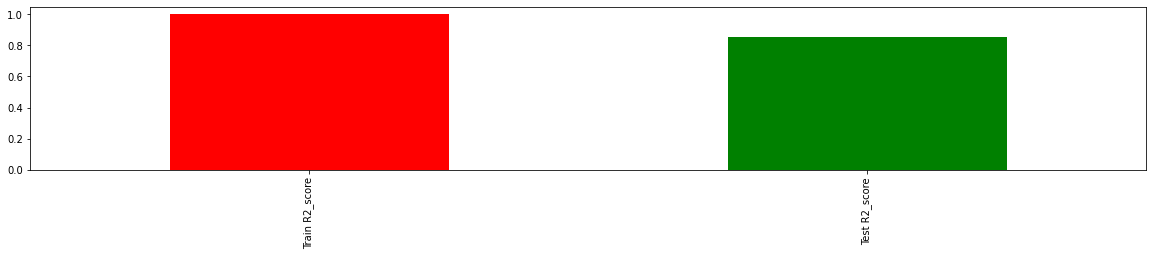

 
R2_score train : 0.9999966605200938
R2_score test : 0.8559298618901691



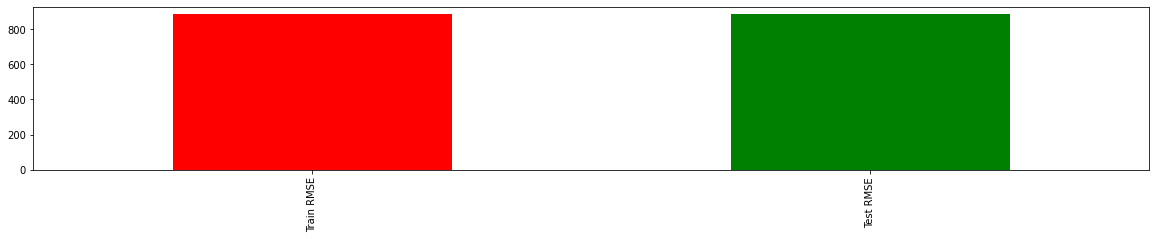

 
Root mean squared error train : 4.252185400593816
Root mean squared error test : 885.0689553316195


In [104]:
# Visualizing evaluation Metric Score chart

# Metrices
show_metrix(xtrain,ytrain,xtest,ytest)

#### 2. Cross- Validation & Hyperparameter Tuning

In [105]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
grid_params = {'max_depth' : [13],'random_state':[1], 'min_samples_leaf': [5]}
grid_model = GridSearchCV(estimator=dtrModel,cv= 3, param_grid=grid_params, verbose=2)

# Fit the Algorithm
grid_model.fit(xtrain,ytrain)
bestDtrEstimator = grid_model.best_estimator_
# Predict on the model
pred_train = bestDtrEstimator.predict(xtrain)
pred_test = bestDtrEstimator.predict(xtest)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ...max_depth=13, min_samples_leaf=5, random_state=1; total time=  15.4s
[CV] END ...max_depth=13, min_samples_leaf=5, random_state=1; total time=  14.2s
[CV] END ...max_depth=13, min_samples_leaf=5, random_state=1; total time=  14.1s


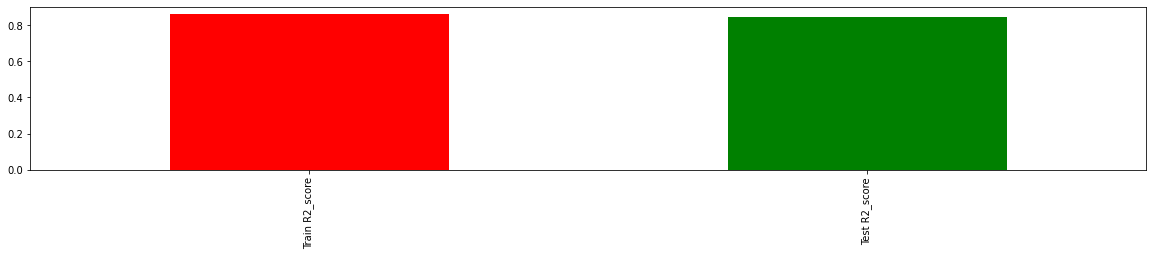

 
R2_score train : 0.8588030715144352
R2_score test : 0.8439849547723998



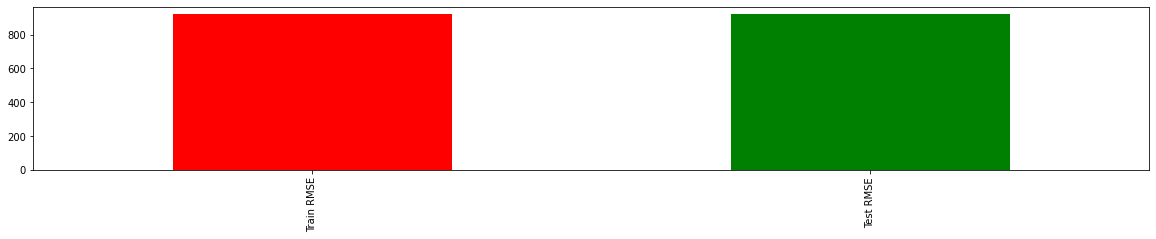

 
Root mean squared error train : 874.3501712629944
Root mean squared error test : 921.0291214928262


In [106]:
# Visualizing evaluation Metric Score chart
# Metrices
show_metrix(xtrain,ytrain,xtest,ytest)

##### Which hyperparameter optimization technique have you used and why?

I used ['max_depth' : [12],'random_state':[1], 'min_samples_leaf': [5]] to avoid overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes earlier the model was overfitted but after cross validation model is good.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

I am using r2score to see the score  of the model and root mean squared error to determine the error. r2 score for the model in train case is .85 and in test case .84. Error for train is 872 and for test is 922 so the difference is not much therefore after applying cross validation and  hyper parameter tuning the model is working good.

### ML Model - 3 - XGBoostRegressor

In [107]:
# ML Model - 3 Implementation
xgbModel = XGBRegressor(random_state=0)
# Fit the Algorithm
xgbModel.fit(xtrain,ytrain)
# Predict on the model
pred_train = xgbModel.predict(xtrain)
pred_test = xgbModel.predict(xtest)

[10:32:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

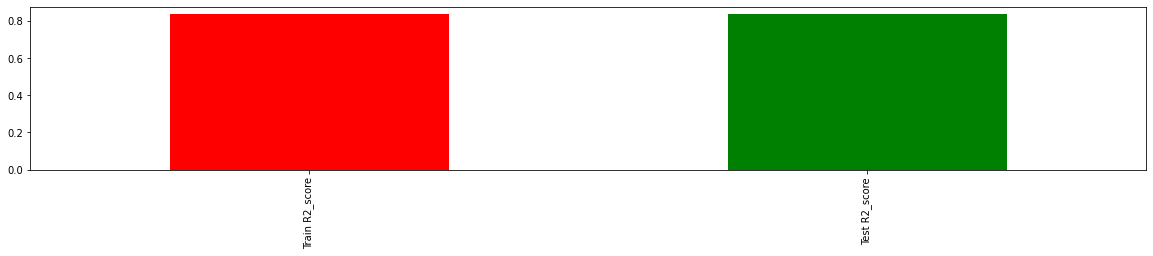

 
R2_score train : 0.8344907857140559
R2_score test : 0.8340917722244305



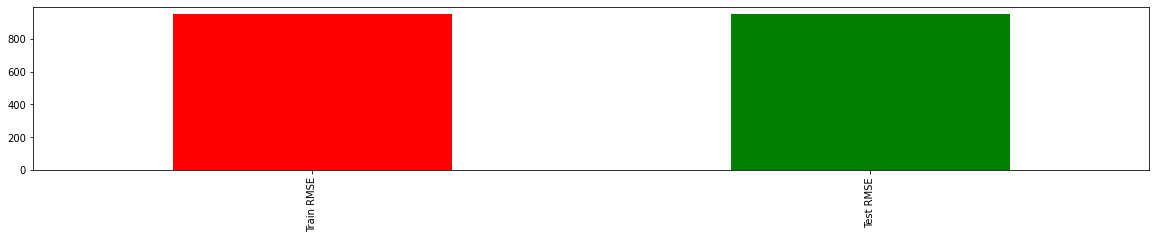

 
Root mean squared error train : 946.6378457998773
Root mean squared error test : 949.7823255861799


In [108]:
# Visualizing evaluation Metric Score chart
# Metrices
show_metrix(xtrain,ytrain,xtest,ytest)

#### 2. Cross- Validation & Hyperparameter Tuning

In [109]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
grid_params = {'learning_rate':[.8],'random_state' :[0],'n_estimators': [120]}
grid_model = GridSearchCV(estimator=xgbModel,cv= 5, param_grid=grid_params,verbose=2)

# Fit the Algorithm
grid_model.fit(xtrain,ytrain)
bestXGBEstimator = grid_model.best_estimator_

# Predict on the model
pred_train = bestXGBEstimator.predict(xtrain)
pred_test = bestXGBEstimator.predict(xtest)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[10:33:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.8, n_estimators=120, random_state=0; total time= 1.8min
[10:35:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.8, n_estimators=120, random_state=0; total time= 2.1min
[10:37:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.8, n_estimators=120, random_state=0; total time= 1.9min
[10:39:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.8, n_estimators=120, random_state=0; total time= 1.9min
[10:41:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of 

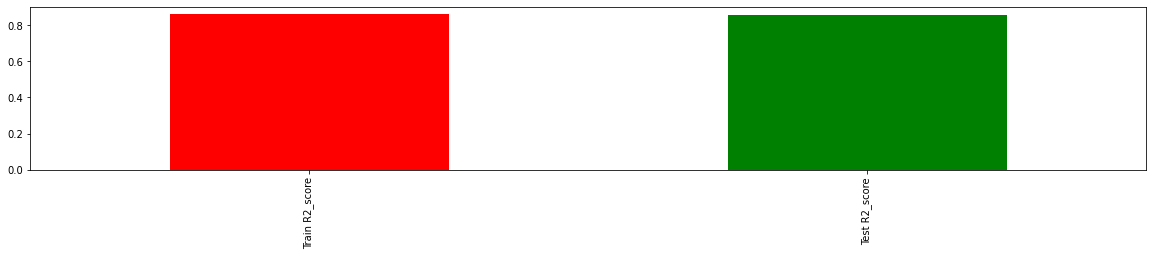

 
R2_score train : 0.86005994581542
R2_score test : 0.858568685942845



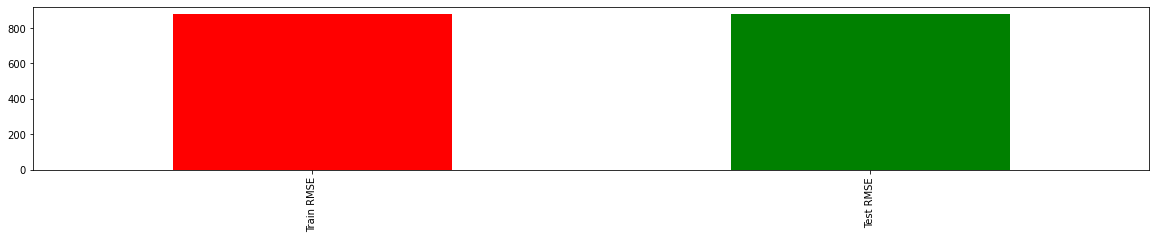

 
Root mean squared error train : 870.4499277909589
Root mean squared error test : 876.9259253346709


In [110]:
# Visualizing evaluation Metric Score chart
# Metrices
show_metrix(xtrain,ytrain,xtest,ytest)

In [111]:
# Get the best parameters
grid_model.best_params_

{'learning_rate': 0.8, 'n_estimators': 120, 'random_state': 0}

##### Which hyperparameter optimization technique have you used and why?

I used 
* 'learning_rate':[.8] - to get better accuracy
* 'random_state' :[0] - to avoid different splits
* 'n_estimators': [120] - to get better accuracy

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes the model is slightly improved and giving better scores.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I considered 
* R2 score to compare the scores
* mean squared error to compare errors.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I choosed the third model for my final prediction because this model is giving highest r2 score and least error.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [112]:
import shap
explainer = shap.Explainer(bestXGBEstimator)
shap_values = explainer(xtest)

In [113]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Forceplot for first observation
shap.plots.force(shap_values[0])

Force plot shows how features are contributing and the relationship between the features in straight line.

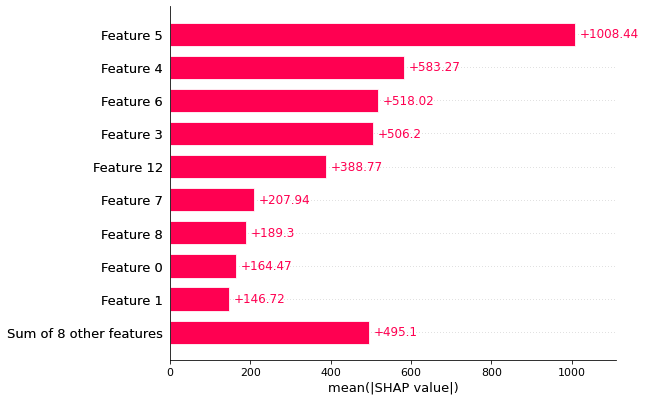

In [114]:
#Mean SHAP
shap.plots.bar(shap_values)

In bar plot for each feature we calculate mean of the absolute shap values across all observations. Feature that have large mean shap values are those features which have a huge impact on the model prediction.

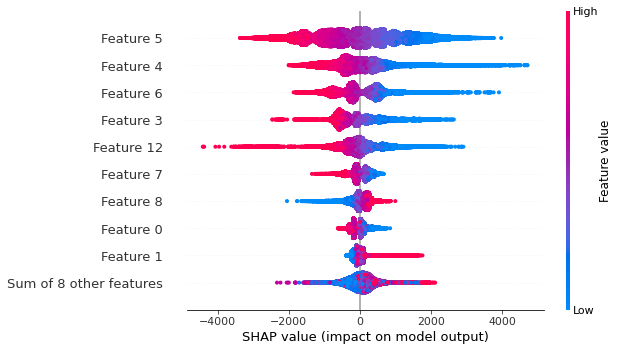

In [115]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

Beeswarm highlights important relationships of the features from the above chart we can see feature 5, 4,6,3,12 have very huge impact on prediction.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [116]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [117]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. Here are some solutions to predict sales
2. Delete the observations when stores are not opened and also delete the column open because it will contain constant value.
3. Target column follows normal distribution if I remove zeros from the data.
4. Sum of the sale is least on day 7 it is because mostly on day 7 stores are not opened.
5. Average sale is more than 60% in case of promo.
6. Average sale is high when there is school holiday.
7. Average sale in case of state holiday is less than 3% for each a,b and c.
8. Average sales for store type b is highest that is 37% and for type a,c,d is approximately 21%.
9. Average sales for assortment b is highest that is more than 42% and for a and c are 27.3% and 30.2% respectively.
10. Average sales for promo2 is only 47%.
11. We can deploy the model with XGBoost algorithm. Because for training and test dataset, I found 85% r2 scores, 903 and 912 root mean squared error respectively.
12. No overfitting is seen.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***